# Import Packages

In [1]:
library(dplyr)
library(tidyr)
library(IDPmisc)
library(ggplot2)
library(repr) # options() to change size of plot image
library(gridExtra)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




# Import Data

* The data was retrieved from the (BioLINCC)[https://biolincc.nhlbi.nih.gov/teaching/]
* Data from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts which was collected during three examination periods, approximately 6 years apart, from roughly 1956 to 1968
* Missing values in the dataset are indicated by a period (.)
* Disclaimer: This is teaching data that has been rendered anonymous through the application of certain statistical processes such as permutations and/or random visit selection. We cannot claim or imply that any inferences derived from the teaching datasets are valid estimates

## Data Dictionary

|Variable|Description|Levels (if applicable)/<br> Notes|
| --- | --- |---|
|RANDID | Unique identification number for each participant||
|SEX | Participant sex |1=Men <br> 2=Women|
|PERIOD|Examination Cycle|1=Period 1 <br> 2=Period 2 <br> 3=Period 3|
|TIME| Number of days since baseline exam||
|AGE|AGE at exam (years)||
|SYSBP|Systolic Blood Pressure (mean of last two of three <br> measurements) (mmHg)|
|DIABP|Diastolic Blood Pressure (mean of last two of three <br> measurements) (mmHg)|
|BPMEDS|Use of Anti-hypertensive medication at exam|0=Not currently used <br> 1=Current Use|
|CURSMOKE|Current cigarette smoking at exam|0=Not current smoker <br> 1=Current smoker|
|CIGPDAY|Number of cigarettes smoked each day|0=Not current smoker <br> 1-90 cigarettes per day|
|TOTCHOL|Serum Total Cholesterol (mg/dL)||
|HDLC|High Density Lipoprotein Cholesterol (mg/dL)|available for period 3 only|
|LDLC|Low Density Lipoprotein Cholesterol (mg/dL)|available for period 3 only|
|BMI|Body Mass Index, weight in kilograms/height <br> meters squared||
|GLUCOSE|Casual serum GLUCOSE (mg/dL)||
|DIABETES|Diabetic according to criteria of first exam <br> treated or first exam with casual GLUCOSE <br> of 200 mg/dL or more|0=Not a diabetic <br> 1=Diabetic|
|HEARTRTE|Heart rate (Ventricular rate) in beats/min|
|PREVHYP|Prevalent Hypertensive. Subject was defined as <br> hypertensive if treated or if second exam at <br>which mean systolic was >=140 mmHg or mean<br>  Diastolic >=90 mmHg|0=Free of disease <br> 1=Prevalent disease|
|ANYCHD|Angina Pectoris, <br> Myocardial infarction (Hospitalized and silent or unrecognized), <br>Coronary Insufficiency (Unstable Angina), <br> or Fatal Coronary Heart Disease|0=Event did not occur during follow up <br> 1=Event occurred during followup|
|STROKE|Atherothrombotic infarction, <br>Cerebral Embolism, <br>Intracerebral HemorrhAGE, <br> or Subarachnoid HemorrhAGE, <br> or Fatal Cerebrovascular Disease|0=Event did not occur during follow up <br> 1=Event occurred during followup|
|DEATH|Death from any cause|0=Event did not occur during follow up <br> 1=Event occurred during followup|

In [2]:
framingham = read.csv('/Users/silviacatalina/Google Drive/BethelTech/DS0110-FinalProject/Framingham/Data/csv/frmgham2.csv')
head(framingham)

RANDID SEX TOTCHOL AGE SYSBP DIABP CURSMOKE CIGPDAY BMI   DIABETES ⋯ CVD
1 2448   1   195     39  106.0 70.0  0         0      26.97 0        ⋯ 1  
2 2448   1   209     52  121.0 66.0  0         0         NA 0        ⋯ 1  
3 6238   2   250     46  121.0 81.0  0         0      28.73 0        ⋯ 0  
4 6238   2   260     52  105.0 69.5  0         0      29.43 0        ⋯ 0  
5 6238   2   237     58  108.0 66.0  0         0      28.50 0        ⋯ 0  
6 9428   1   245     48  127.5 80.0  1        20      25.34 0        ⋯ 0  
  HYPERTEN TIMEAP TIMEMI TIMEMIFC TIMECHD TIMESTRK TIMECVD TIMEDTH TIMEHYP
1 0        8766   6438   6438     6438    8766     6438    8766    8766   
2 0        8766   6438   6438     6438    8766     6438    8766    8766   
3 0        8766   8766   8766     8766    8766     8766    8766    8766   
4 0        8766   8766   8766     8766    8766     8766    8766    8766   
5 0        8766   8766   8766     8766    8766     8766    8766    8766   
6 0        8766   8766   8766     8766    8766     8766    8766    8766

In [3]:
str(framingham)

'data.frame':	11627 obs. of  39 variables:
 $ RANDID  : int  2448 2448 6238 6238 6238 9428 9428 10552 10552 11252 ...
 $ SEX     : int  1 1 2 2 2 1 1 2 2 2 ...
 $ TOTCHOL : int  195 209 250 260 237 245 283 225 232 285 ...
 $ AGE     : int  39 52 46 52 58 48 54 61 67 46 ...
 $ SYSBP   : num  106 121 121 105 108 ...
 $ DIABP   : num  70 66 81 69.5 66 80 89 95 109 84 ...
 $ CURSMOKE: int  0 0 0 0 0 1 1 1 1 1 ...
 $ CIGPDAY : int  0 0 0 0 0 20 30 30 20 23 ...
 $ BMI     : num  27 NA 28.7 29.4 28.5 ...
 $ DIABETES: int  0 0 0 0 0 0 0 0 0 0 ...
 $ BPMEDS  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HEARTRTE: int  80 69 95 80 80 75 75 65 60 85 ...
 $ GLUCOSE : int  77 92 76 86 71 70 87 103 89 85 ...
 $ educ    : int  4 4 2 2 2 1 1 3 3 3 ...
 $ PREVCHD : int  0 0 0 0 0 0 0 0 0 0 ...
 $ PREVAP  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ PREVMI  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ PREVSTRK: int  0 0 0 0 0 0 0 0 0 0 ...
 $ PREVHYP : int  0 0 0 0 0 0 0 1 1 0 ...
 $ TIME    : int  0 4628 0 2156 4344 0 2199 0 1977 0 ...

# Data Wrangling

## Select Columns of interest

In [4]:
keep=c('RANDID', 'SEX', 'PERIOD', 'AGE', 'SYSBP', 'DIABP', 'BPMEDS', 'CURSMOKE', 'CIGPDAY', 'TOTCHOL', 
       'BMI', 'GLUCOSE', 'DIABETES', 'HEARTRTE', 'PREVHYP', 'ANYCHD', 'STROKE', 'DEATH')
framingham1 = framingham[keep]
str(framingham1)

'data.frame':	11627 obs. of  18 variables:
 $ RANDID  : int  2448 2448 6238 6238 6238 9428 9428 10552 10552 11252 ...
 $ SEX     : int  1 1 2 2 2 1 1 2 2 2 ...
 $ PERIOD  : int  1 3 1 2 3 1 2 1 2 1 ...
 $ AGE     : int  39 52 46 52 58 48 54 61 67 46 ...
 $ SYSBP   : num  106 121 121 105 108 ...
 $ DIABP   : num  70 66 81 69.5 66 80 89 95 109 84 ...
 $ BPMEDS  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ CURSMOKE: int  0 0 0 0 0 1 1 1 1 1 ...
 $ CIGPDAY : int  0 0 0 0 0 20 30 30 20 23 ...
 $ TOTCHOL : int  195 209 250 260 237 245 283 225 232 285 ...
 $ BMI     : num  27 NA 28.7 29.4 28.5 ...
 $ GLUCOSE : int  77 92 76 86 71 70 87 103 89 85 ...
 $ DIABETES: int  0 0 0 0 0 0 0 0 0 0 ...
 $ HEARTRTE: int  80 69 95 80 80 75 75 65 60 85 ...
 $ PREVHYP : int  0 0 0 0 0 0 0 1 1 0 ...
 $ ANYCHD  : int  1 1 0 0 0 0 0 0 0 0 ...
 $ STROKE  : int  0 0 0 0 0 0 0 1 1 0 ...
 $ DEATH   : int  0 0 0 0 0 0 0 1 1 0 ...


## Split Dataset into Periods 1, 2, 3; Remove NAs

In [5]:
framinghamP1 = framingham1 %>% filter(PERIOD == 1)
framinghamP1 = subset(framinghamP1, select  = - PERIOD)
framinghamP1 = NaRV.omit(framinghamP1)
head(framinghamP1)

RANDID SEX AGE SYSBP DIABP BPMEDS CURSMOKE CIGPDAY TOTCHOL BMI   GLUCOSE
1  2448  1   39  106.0  70   0      0         0      195     26.97  77    
2  6238  2   46  121.0  81   0      0         0      250     28.73  76    
3  9428  1   48  127.5  80   0      1        20      245     25.34  70    
4 10552  2   61  150.0  95   0      1        30      225     28.58 103    
5 11252  2   46  130.0  84   0      1        23      285     23.10  85    
6 11263  2   43  180.0 110   0      0         0      228     30.30  99    
  DIABETES HEARTRTE PREVHYP ANYCHD STROKE DEATH
1 0        80       0       1      0      0    
2 0        95       0       0      0      0    
3 0        75       0       0      0      0    
4 0        65       1       0      1      1    
5 0        85       0       0      0      0    
6 0        77       1       1      0      0

In [6]:
framinghamP2 = framingham1 %>% filter(PERIOD == 2)
framinghamP2 = subset(framinghamP2, select  = - PERIOD)
framinghamP2 = NaRV.omit(framinghamP2)
head(framinghamP2)

RANDID SEX AGE SYSBP DIABP BPMEDS CURSMOKE CIGPDAY TOTCHOL BMI   GLUCOSE
1  6238  2   52  105    69.5 0      0         0      260     29.43 86     
2  9428  1   54  141    89.0 0      1        30      283     25.34 87     
3 10552  2   67  183   109.0 0      1        20      232     30.18 89     
4 11252  2   51  109    77.0 0      1        30      343     23.48 72     
5 11263  2   49  177   102.0 1      0         0      230     31.36 86     
6 12629  2   70  149    81.0 0      0         0      220     36.76 98     
  DIABETES HEARTRTE PREVHYP ANYCHD STROKE DEATH
1 0         80      0       0      0      0    
2 0         75      0       0      0      0    
3 0         60      1       0      1      1    
4 0         90      0       0      0      0    
5 0        120      1       1      0      0    
6 0         80      1       1      0      0

In [7]:
framinghamP3 = framingham1 %>% filter(PERIOD == 3)
framinghamP3 = subset(framinghamP3, select  = - PERIOD)
framinghamP3 = NaRV.omit(framinghamP3)
head(framinghamP3)

RANDID SEX AGE SYSBP DIABP BPMEDS CURSMOKE CIGPDAY TOTCHOL BMI   GLUCOSE
2  6238  2   58  108    66   0      0         0      237     28.50  71    
4 11263  2   55  180   106   1      0         0      220     31.17  81    
5 12806  2   57  110    46   0      1        30      320     22.02  87    
6 14367  1   64  168   100   0      0         0      280     25.72  82    
7 16365  1   55  173   123   1      0         0      211     29.11  85    
9 23727  2   53  124    78   0      0         0      159     26.62 135    
  DIABETES HEARTRTE PREVHYP ANYCHD STROKE DEATH
2 0        80       0       0      0      0    
4 1        86       1       1      0      0    
5 0        75       0       0      0      0    
6 0        92       1       0      0      0    
7 0        75       1       0      0      0    
9 0        68       1       0      0      1

# <font color = blue> __Statistical Analyses - Continuous Variables__ </font>
***
### 1. How do demographic and behavioral factors influence the risk for heart disease?

* DV: __ANYCHD__, categorical variable with 2 levels
* Continuous IVs: __*Stepwise Binary Logistic Regression*__ - How do the following influence the risk for heart disease, and how much does each influence it?
    * __AGE__
    * __CIGPDAY__
    
### 2. How do health metrics influence a diagnosis of heart disease?
* DV: __ANYCHD__, categorical variable with 2 levels
* Continuous IVs: __*Stepwise Binary Logistic Regression*__ - How do the following influence the risk for heart disease, and how much does each influence it?
    * __TOTCHOL__
    * __SYSBP__
    * __DIABP__
    * __BMI__
    * __HEARTRTE__
    * __GLUCOSE__
    
### _3. Data wrangling note:_
* DV must be recoded to 0/1s (not necessary in this case)

### Data Wrangling: Subset data to variables of interest

In [29]:
keep = c('AGE', 'CIGPDAY', 'TOTCHOL', 'SYSBP', 'DIABP', 'BMI', 'HEARTRTE', 'GLUCOSE', 'ANYCHD')
logitdf = framingham[keep]

## Checking Assumptions

### 1. AGE

#### Sample Size Assumption

In [30]:
mylogit_AGE = glm(ANYCHD ~ AGE, data=logitdf, family="binomial")

In [31]:
probabilities_AGE = predict(mylogit_AGE, type = "response")
logitdf$Predicted_AGE = ifelse(probabilities_AGE > .5, 1, 0)

In [32]:
# Create confusion matrix
conf_mat_Predicted_AGE <- caret::confusionMatrix(as.factor(logitdf$Predicted_AGE), as.factor(logitdf$ANYCHD))
conf_mat_Predicted_AGE

Warning message in confusionMatrix.default(as.factor(logitdf$Predicted_age), as.factor(logitdf$TenYearCHD)):
“Levels are not in the same order for reference and data. Refactoring data to match.”


Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 3505  628
         1    0    0
                                          
               Accuracy : 0.8481          
                 95% CI : (0.8367, 0.8589)
    No Information Rate : 0.8481          
    P-Value [Acc > NIR] : 0.5106          
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 1.0000          
            Specificity : 0.0000          
         Pos Pred Value : 0.8481          
         Neg Pred Value :    NaN          
             Prevalence : 0.8481          
         Detection Rate : 0.8481          
   Detection Prevalence : 1.0000          
      Balanced Accuracy : 0.5000          
                                          
       'Positive' Class : 0               
                        

__*There are 1 or more cells <5, so this variable does not meet the minimum smaple size for logistic regression*__

### Logit Linearity

In [33]:
# Creating the predictors vector
predictors = colnames(logitdf)

In [34]:
# Creating the logit
logitdf1 = logitdf %>%
   mutate(logit=log(probabilities_AGE/(1-probabilities_AGE))) %>%
   gather(key= "predictors", value="predictor.value", -logit)

`geom_smooth()` using formula 'y ~ x'



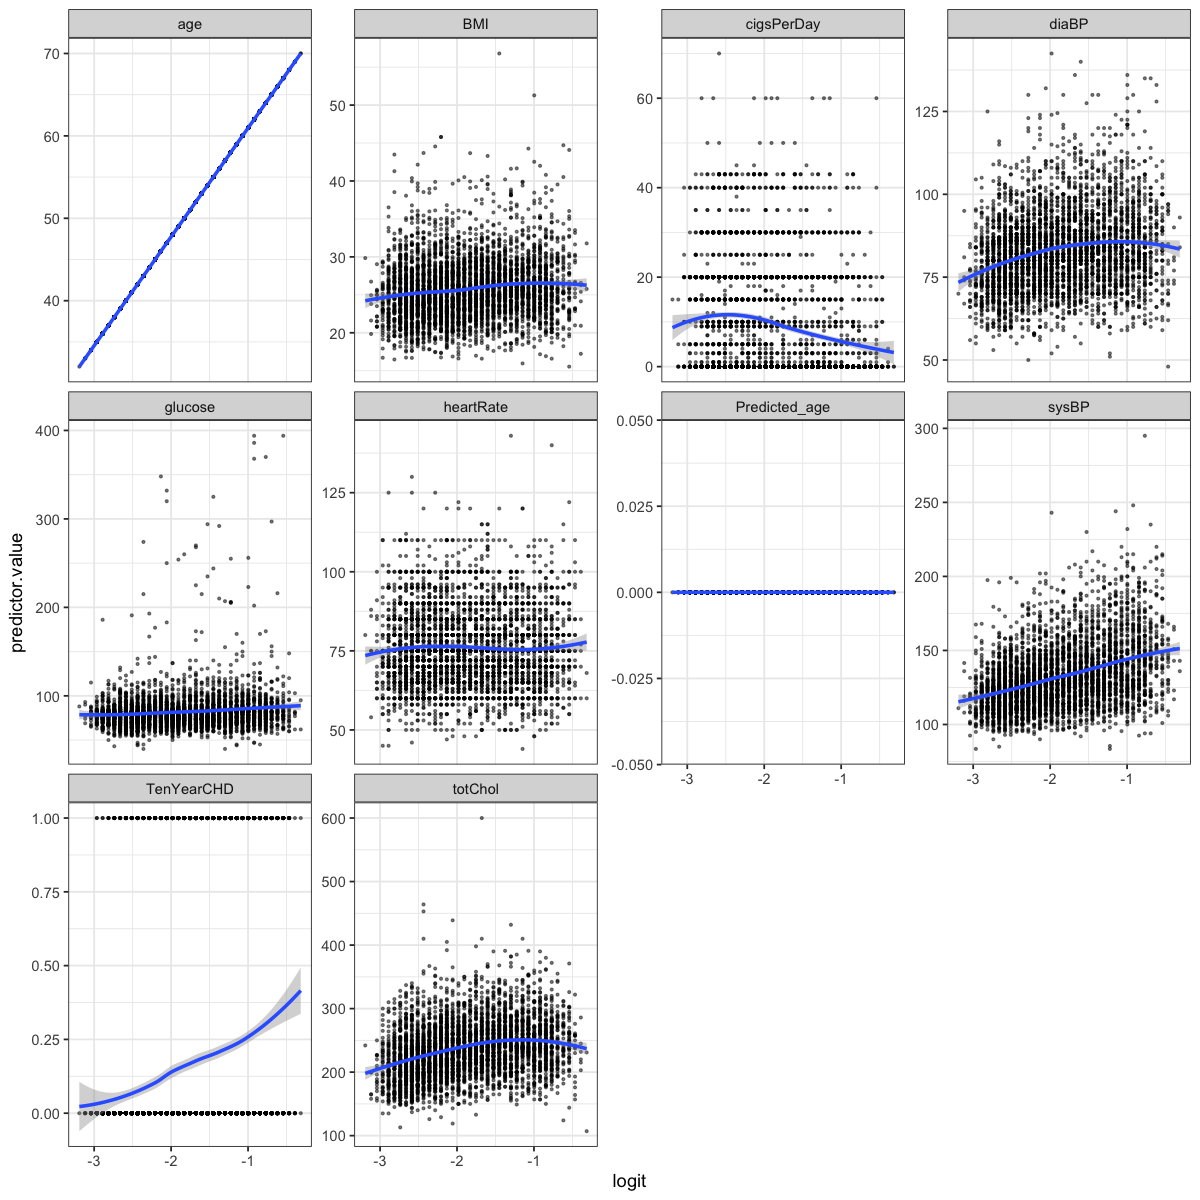

In [35]:
# Plotting to determine linearity
ggplot(logitdf1, aes(logit, predictor.value))+
geom_point(size=.5, alpha=.5)+
geom_smooth(method= "loess")+
theme_bw()+
facet_wrap(~predictors, scales="free_y")

### 2. Cigarettes per Day

In [36]:
logitdf = framingham[keep]
mylogit_CIGPDAY = glm(ANYCHD ~ CIGPDAY, data=logitdf, family="binomial")

In [37]:
# Predict risk for heart disease
probabilities_CIGPDAY = predict(mylogit_CIGPDAY, type = "response")
logitdf$Predicted_CIGPDAY <- ifelse(probabilities_CIGPDAY > .5, 1, 0)

In [38]:
# Create confusion matrices
conf_mat_Predicted_CIGPDAY <- caret::confusionMatrix(as.factor(logitdf$Predicted_CIGPDAY), as.factor(logitdf$ANYCHD))
conf_mat_Predicted_CIGPDAY 

Warning message in confusionMatrix.default(as.factor(logitdf$Predicted_cigsPerDay), :
“Levels are not in the same order for reference and data. Refactoring data to match.”


Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 3505  628
         1    0    0
                                          
               Accuracy : 0.8481          
                 95% CI : (0.8367, 0.8589)
    No Information Rate : 0.8481          
    P-Value [Acc > NIR] : 0.5106          
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 1.0000          
            Specificity : 0.0000          
         Pos Pred Value : 0.8481          
         Neg Pred Value :    NaN          
             Prevalence : 0.8481          
         Detection Rate : 0.8481          
   Detection Prevalence : 1.0000          
      Balanced Accuracy : 0.5000          
                                          
       'Positive' Class : 0               
                        

__*There are 1 or more cells that are <5, so this variable does not meet the minimum smaple size for logistic regression*__

### Logit Linearity

In [39]:
# Creating the predictors vector
predictors = colnames(logitdf)

In [40]:
# Creating the logit
logitdf1 = logitdf %>%
   mutate(logit=log(probabilities_CIGPDAY/(1-probabilities_CIGPDAY))) %>%
   gather(key= "predictors", value="predictor.value", -logit)

`geom_smooth()` using formula 'y ~ x'



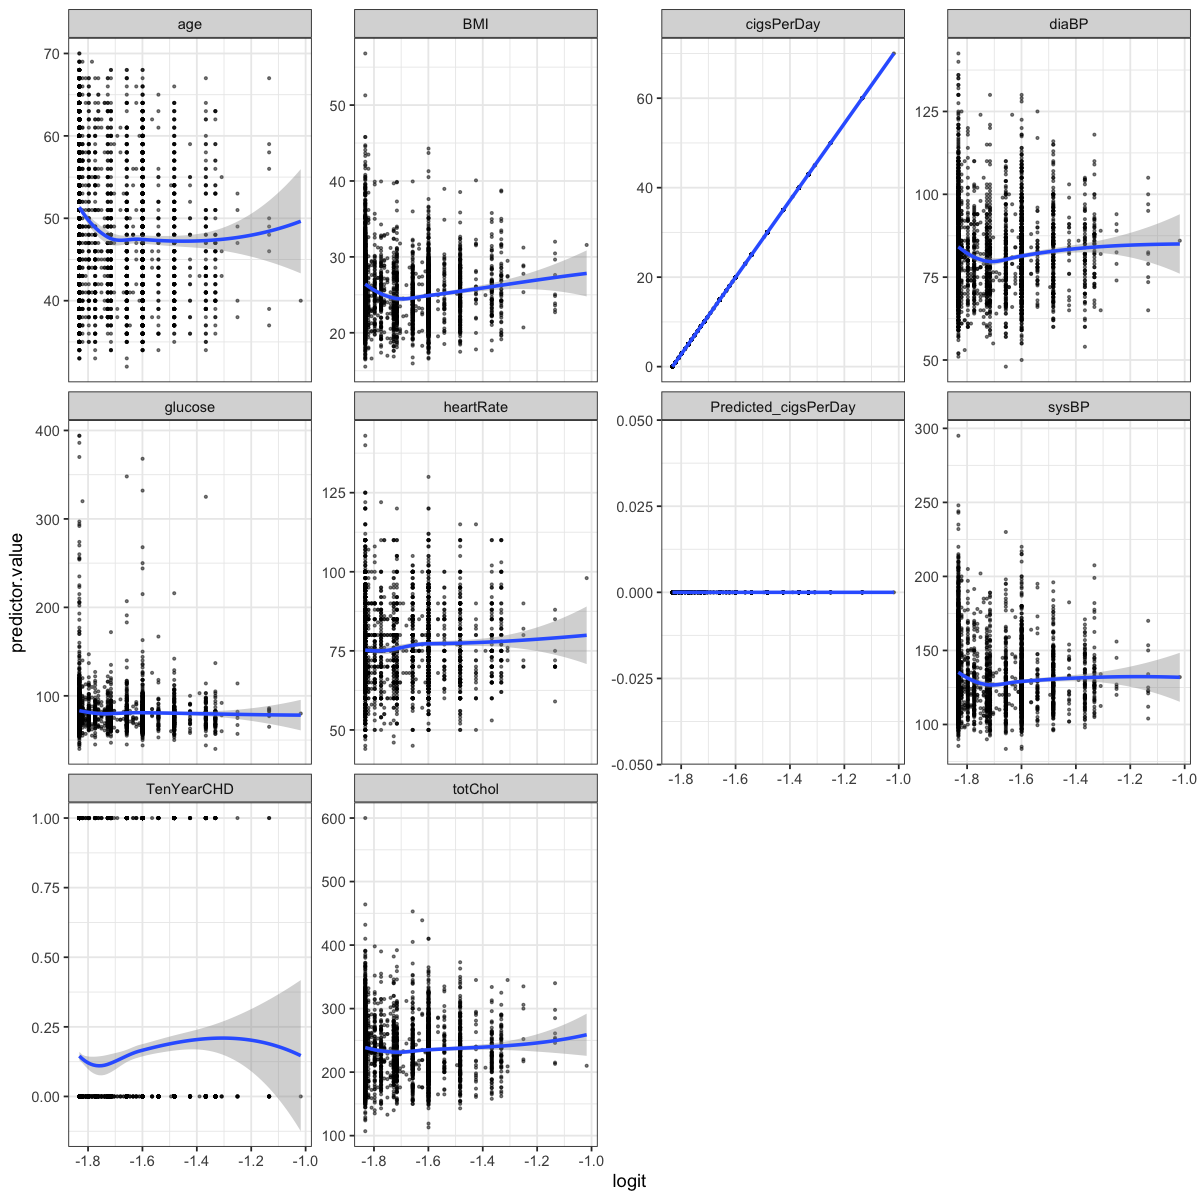

In [41]:
ggplot(logitdf1, aes(logit, predictor.value))+
geom_point(size=.5, alpha=.5)+
geom_smooth(method= "loess")+
theme_bw()+
facet_wrap(~predictors, scales="free_y")

### 3. Total Cholesterol

In [42]:
logitdf = framingham[keep]
mylogit_TOTCHOL = glm(ANYCHD ~ TOTCHOL, data=logitdf, family="binomial")

In [43]:
# Predict risk for heart disease
probabilities_TOTCHOL = predict(mylogit_TOTCHOL, type = "response")
logitdf$Predicted_TOTCHOL <- ifelse(probabilities_TOTCHOL > .5, 1, 0)

In [44]:
# Create confusion matrices
conf_mat_Predicted_TOTCHOL <- caret::confusionMatrix(as.factor(logitdf$Predicted_TOTCHOL), as.factor(logitdf$ANYCHD))
conf_mat_Predicted_TOTCHOL 

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 3505  627
         1    0    1
                                         
               Accuracy : 0.8483         
                 95% CI : (0.837, 0.8591)
    No Information Rate : 0.8481         
    P-Value [Acc > NIR] : 0.4934         
                                         
                  Kappa : 0.0027         
                                         
 Mcnemar's Test P-Value : <2e-16         
                                         
            Sensitivity : 1.000000       
            Specificity : 0.001592       
         Pos Pred Value : 0.848258       
         Neg Pred Value : 1.000000       
             Prevalence : 0.848052       
         Detection Rate : 0.848052       
   Detection Prevalence : 0.999758       
      Balanced Accuracy : 0.500796       
                                         
       'Positive' Class : 0              
                                         

__*There are 1 or more cells that are <5, so this variable does not meet the minimum smaple size for logistic regression*__

### Logit Linearity

In [45]:
# Creating the predictors vector
predictors = colnames(logitdf)

In [46]:
# Creating the logit
logitdf1 = logitdf %>%
   mutate(logit=log(probabilities_TOTCHOL/(1-probabilities_TOTCHOL))) %>%
   gather(key= "predictors", value="predictor.value", -logit)

`geom_smooth()` using formula 'y ~ x'



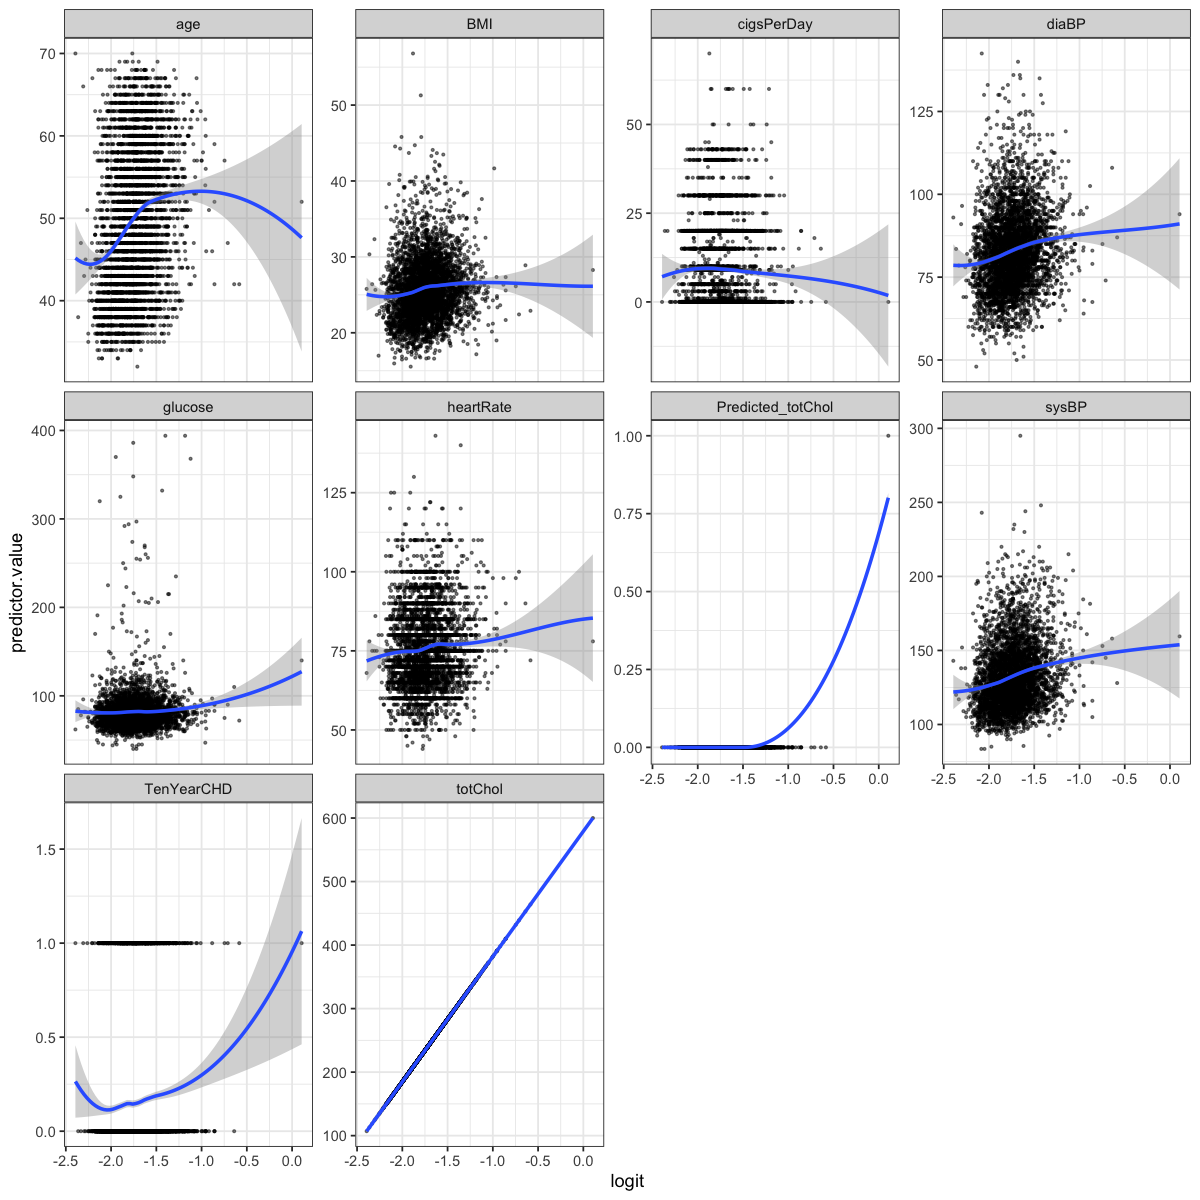

In [47]:
ggplot(logitdf1, aes(logit, predictor.value))+
geom_point(size=.5, alpha=.5)+
geom_smooth(method= "loess")+
theme_bw()+
facet_wrap(~predictors, scales="free_y")

### 4. Systolic Blood Pressure

In [48]:
logitdf = framingham[keep]
mylogit_SYSBP = glm(ANYCHD ~ SYSBP, data=logitdf, family="binomial")

In [49]:
# Predict risk for heart disease
probabilities_SYSBP = predict(mylogit_SYSBP, type = "response")
logitdf$Predicted_SYSBP <- ifelse(probabilities_SYSBP > .5, 1, 0)

In [50]:
# Create confusion matrices
conf_mat_Predicted_SYSBP <- caret::confusionMatrix(as.factor(logitdf$Predicted_SYSBP), as.factor(logitdf$ANYCHD))
conf_mat_Predicted_SYSBP

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 3495  614
         1   10   14
                                          
               Accuracy : 0.849           
                 95% CI : (0.8377, 0.8598)
    No Information Rate : 0.8481          
    P-Value [Acc > NIR] : 0.4417          
                                          
                  Kappa : 0.0321          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.99715         
            Specificity : 0.02229         
         Pos Pred Value : 0.85057         
         Neg Pred Value : 0.58333         
             Prevalence : 0.84805         
         Detection Rate : 0.84563         
   Detection Prevalence : 0.99419         
      Balanced Accuracy : 0.50972         
                                          
       'Positive' Class : 0               
                        

__*All cells that are >=5, so this variable meets the minimum smaple size for logistic regression*__

### Logit Linearity

In [51]:
# Creating the predictors vector
predictors = colnames(logitdf)

In [52]:
# Creating the logit
logitdf1 = logitdf %>%
   mutate(logit=log(probabilities_SYSBP/(1-probabilities_SYSBP))) %>%
   gather(key= "predictors", value="predictor.value", -logit)

`geom_smooth()` using formula 'y ~ x'



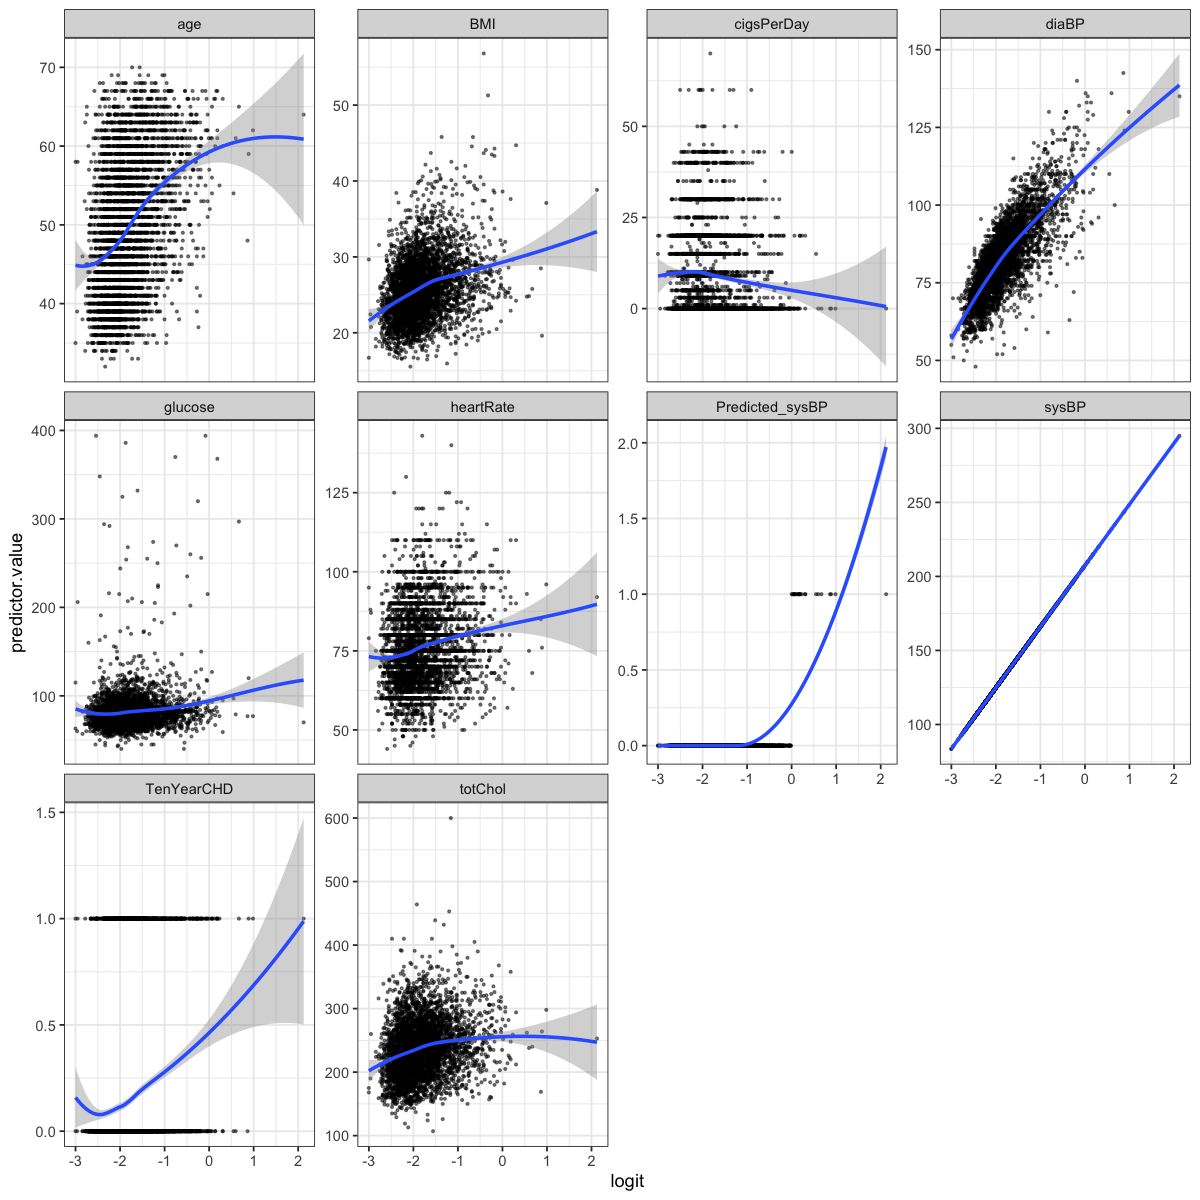

In [53]:
ggplot(logitdf1, aes(logit, predictor.value))+
geom_point(size=.5, alpha=.5)+
geom_smooth(method= "loess")+
theme_bw()+
facet_wrap(~predictors, scales="free_y")

### 5. Diastolic Blood Pressure

In [54]:
logitdf = framingham[keep]
mylogit_DIABP = glm(ANYCHD ~ DIABP, data=logitdf, family="binomial")

In [55]:
# Predict risk for heart disease
probabilities_DIABP = predict(mylogit_DIABP, type = "response")
logitdf$Predicted_DIABP <- ifelse(probabilities_DIABP > .5, 1, 0)

In [56]:
# Create confusion matrices
conf_mat_Predicted_DIABP <- caret::confusionMatrix(as.factor(logitdf$Predicted_DIABP), as.factor(logitdf$ANYCHD))
conf_mat_Predicted_DIABP 

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 3504  627
         1    1    1
                                          
               Accuracy : 0.8481          
                 95% CI : (0.8367, 0.8589)
    No Information Rate : 0.8481          
    P-Value [Acc > NIR] : 0.5106          
                                          
                  Kappa : 0.0022          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.999715        
            Specificity : 0.001592        
         Pos Pred Value : 0.848221        
         Neg Pred Value : 0.500000        
             Prevalence : 0.848052        
         Detection Rate : 0.847810        
   Detection Prevalence : 0.999516        
      Balanced Accuracy : 0.500654        
                                          
       'Positive' Class : 0               
                        

__*There are 1 or more cells that are <5, so this variable does not meet the minimum smaple size for logistic regression*__

### Logit Linearity

In [57]:
# Creating the predictors vector
predictors = colnames(logitdf)

In [58]:
# Creating the logit
logitdf1 = logitdf %>%
   mutate(logit=log(probabilities_DIABP/(1-probabilities_DIABP))) %>%
   gather(key= "predictors", value="predictor.value", -logit)

`geom_smooth()` using formula 'y ~ x'



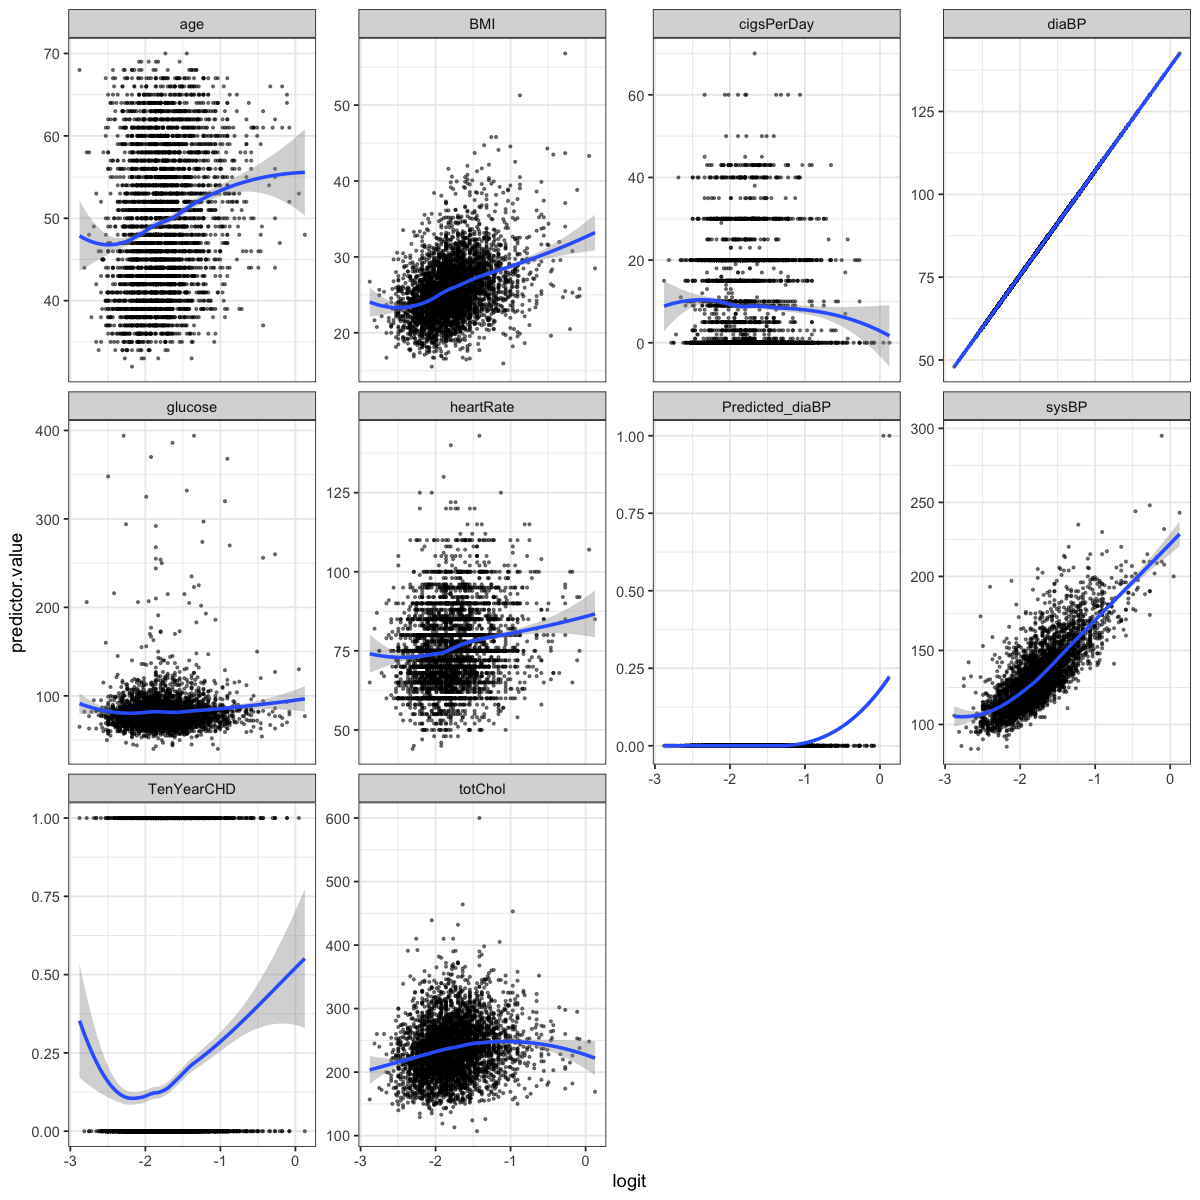

In [59]:
ggplot(logitdf1, aes(logit, predictor.value))+
geom_point(size=.5, alpha=.5)+
geom_smooth(method= "loess")+
theme_bw()+
facet_wrap(~predictors, scales="free_y")

### 6. BMI

In [60]:
logitdf = framingham[keep]
mylogit_BMI = glm(ANYCHD ~ BMI, data=logitdf, family="binomial")

In [61]:
# Predict risk for heart disease
probabilities_BMI = predict(mylogit_BMI, type = "response")
logitdf$Predicted_BMI <- ifelse(probabilities_BMI > .5, 1, 0)

In [62]:
# Create confusion matrix
conf_mat_Predicted_BMI <- caret::confusionMatrix(as.factor(logitdf$Predicted_BMI), as.factor(logitdf$ANYCHD))
conf_mat_Predicted_BMI

Warning message in confusionMatrix.default(as.factor(logitdf$Predicted_BMI), as.factor(logitdf$TenYearCHD)):
“Levels are not in the same order for reference and data. Refactoring data to match.”


Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 3505  628
         1    0    0
                                          
               Accuracy : 0.8481          
                 95% CI : (0.8367, 0.8589)
    No Information Rate : 0.8481          
    P-Value [Acc > NIR] : 0.5106          
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 1.0000          
            Specificity : 0.0000          
         Pos Pred Value : 0.8481          
         Neg Pred Value :    NaN          
             Prevalence : 0.8481          
         Detection Rate : 0.8481          
   Detection Prevalence : 1.0000          
      Balanced Accuracy : 0.5000          
                                          
       'Positive' Class : 0               
                        

__*There are 1 or more cells that are <5, so this variable does not meet the minimum smaple size for logistic regression*__

### Logit Linearity

In [63]:
# Creating the predictors vector
predictors = colnames(logitdf)

In [64]:
# Creating the logit
logitdf1 = logitdf %>%
   mutate(logit=log(probabilities_BMI/(1-probabilities_BMI))) %>%
   gather(key= "predictors", value="predictor.value", -logit)

`geom_smooth()` using formula 'y ~ x'



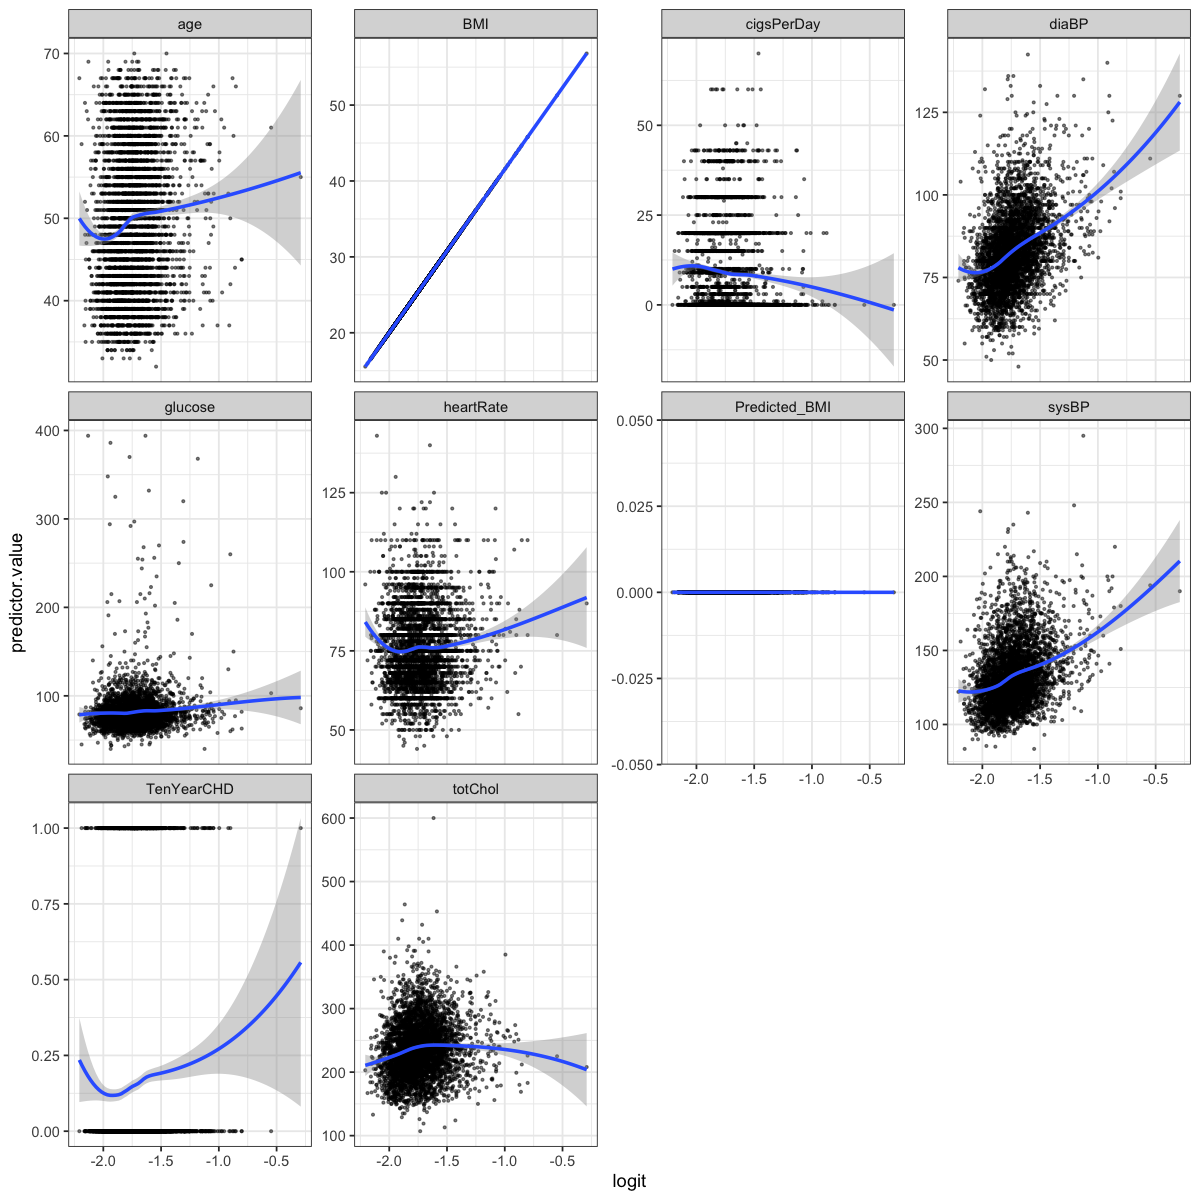

In [65]:
ggplot(logitdf1, aes(logit, predictor.value))+
geom_point(size=.5, alpha=.5)+
geom_smooth(method= "loess")+
theme_bw()+
facet_wrap(~predictors, scales="free_y")

### 7. Heart Rate

In [66]:
logitdf = framingham[keep]
mylogit_HEARTRTE = glm(ANYCHD ~ HEARTRTE, data=logitdf, family="binomial")

In [67]:
# Predict risk for heart disease
probabilities_HEARTRTE = predict(mylogit_HEARTRTE, type = "response")
logitdf$Predicted_HEARTRTE <- ifelse(probabilities_HEARTRTE > .5, 1, 0)

In [68]:
# Create confusion matrices
conf_mat_Predicted_HEARTRTE <- caret::confusionMatrix(as.factor(logitdf$Predicted_HEARTRTE ), as.factor(logitdf$ANYCHD))
conf_mat_Predicted_HEARTRTE

Warning message in confusionMatrix.default(as.factor(logitdf$Predicted_heartRate), :
“Levels are not in the same order for reference and data. Refactoring data to match.”


Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 3505  628
         1    0    0
                                          
               Accuracy : 0.8481          
                 95% CI : (0.8367, 0.8589)
    No Information Rate : 0.8481          
    P-Value [Acc > NIR] : 0.5106          
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 1.0000          
            Specificity : 0.0000          
         Pos Pred Value : 0.8481          
         Neg Pred Value :    NaN          
             Prevalence : 0.8481          
         Detection Rate : 0.8481          
   Detection Prevalence : 1.0000          
      Balanced Accuracy : 0.5000          
                                          
       'Positive' Class : 0               
                        

__*There are 1 or more cells that are <5, so this variable does not meet the minimum smaple size for logistic regression*__

### Logit Linearity

In [69]:
# Creating the predictors vector
predictors = colnames(logitdf)

In [70]:
# Creating the logit
logitdf1 = logitdf %>%
   mutate(logit=log(probabilities_HEARTRTE/(1-probabilities_HEARTRTE))) %>%
   gather(key= "predictors", value="predictor.value", -logit)

`geom_smooth()` using formula 'y ~ x'



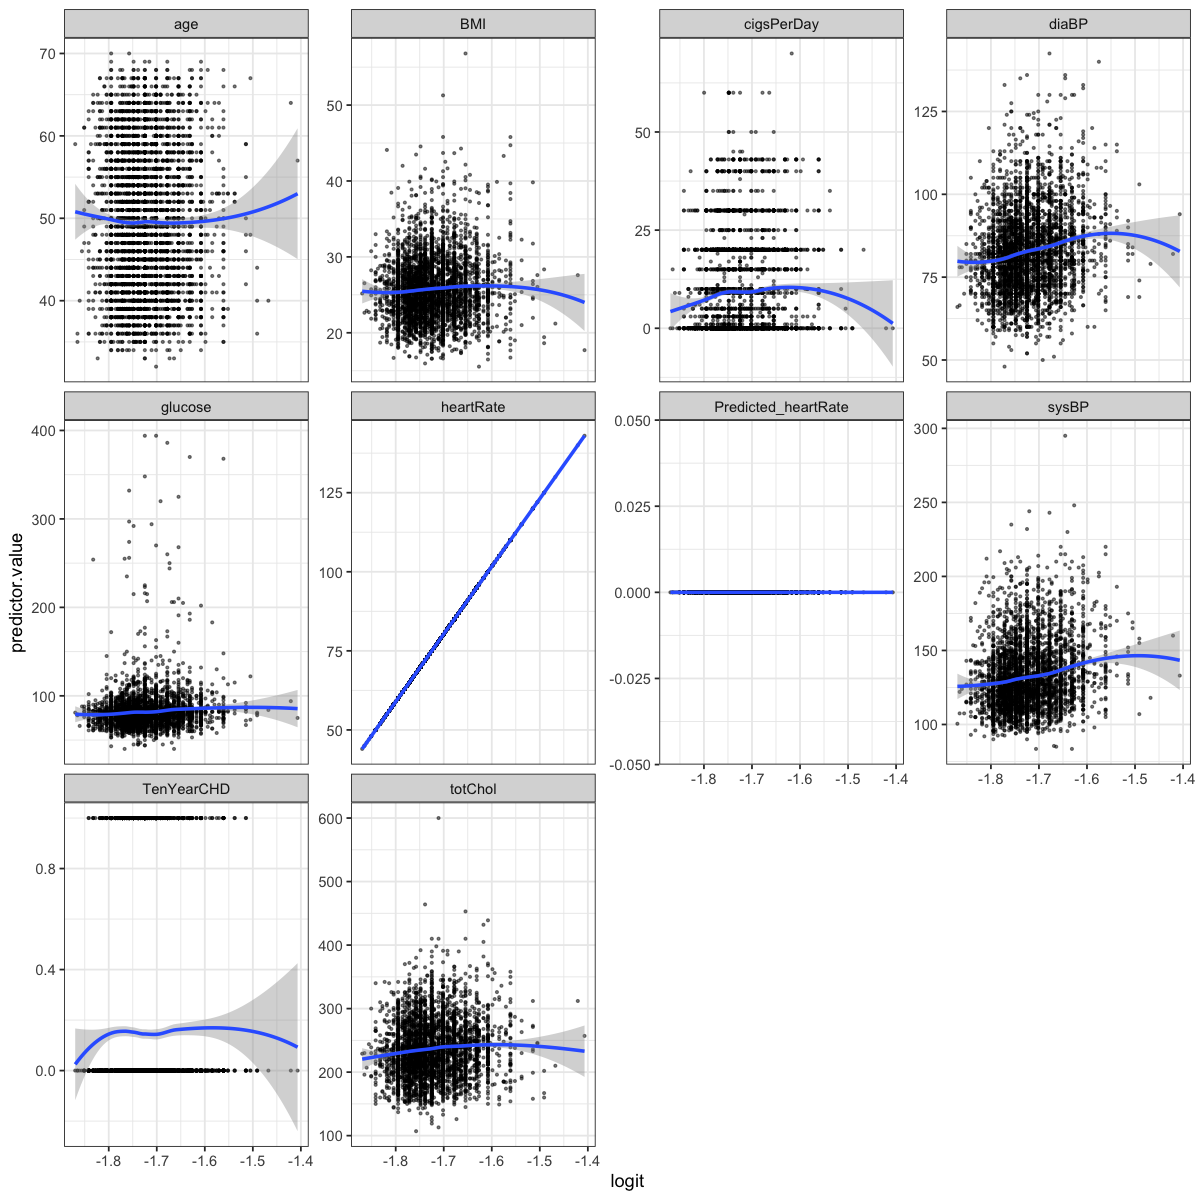

In [71]:
ggplot(logitdf1, aes(logit, predictor.value))+
geom_point(size=.5, alpha=.5)+
geom_smooth(method= "loess")+
theme_bw()+
facet_wrap(~predictors, scales="free_y")

### 8. GLUCOSE

In [72]:
logitdf = framingham[keep]
mylogit_GLUCOSE = glm(ANYCHD ~ GLUCOSE, data=logitdf, family="binomial")

In [73]:
# Predict risk for heart disease
probabilities_GLUCOSE = predict(mylogit_GLUCOSE, type = "response")
logitdf$Predicted_GLUCOSE <- ifelse(probabilities_GLUCOSE > .5, 1, 0)

In [74]:
# Create confusion matrices
conf_mat_Predicted_GLUCOSE <- caret::confusionMatrix(as.factor(logitdf$Predicted_GLUCOSE), as.factor(logitdf$ANYCHD))
conf_mat_Predicted_GLUCOSE

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 3499  614
         1    6   14
                                          
               Accuracy : 0.85            
                 95% CI : (0.8387, 0.8607)
    No Information Rate : 0.8481          
    P-Value [Acc > NIR] : 0.3743          
                                          
                  Kappa : 0.0342          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.99829         
            Specificity : 0.02229         
         Pos Pred Value : 0.85072         
         Neg Pred Value : 0.70000         
             Prevalence : 0.84805         
         Detection Rate : 0.84660         
   Detection Prevalence : 0.99516         
      Balanced Accuracy : 0.51029         
                                          
       'Positive' Class : 0               
                        

__*All cells  are >=5, so this variable meets the minimum smaple size for logistic regression*__

### Logit Linearity

In [75]:
# Creating the predictors vector
predictors = colnames(logitdf)

In [76]:
# Creating the logit
logitdf1 = logitdf %>%
   mutate(logit=log(probabilities_GLUCOSE/(1-probabilities_GLUCOSE))) %>%
   gather(key= "predictors", value="predictor.value", -logit)

`geom_smooth()` using formula 'y ~ x'



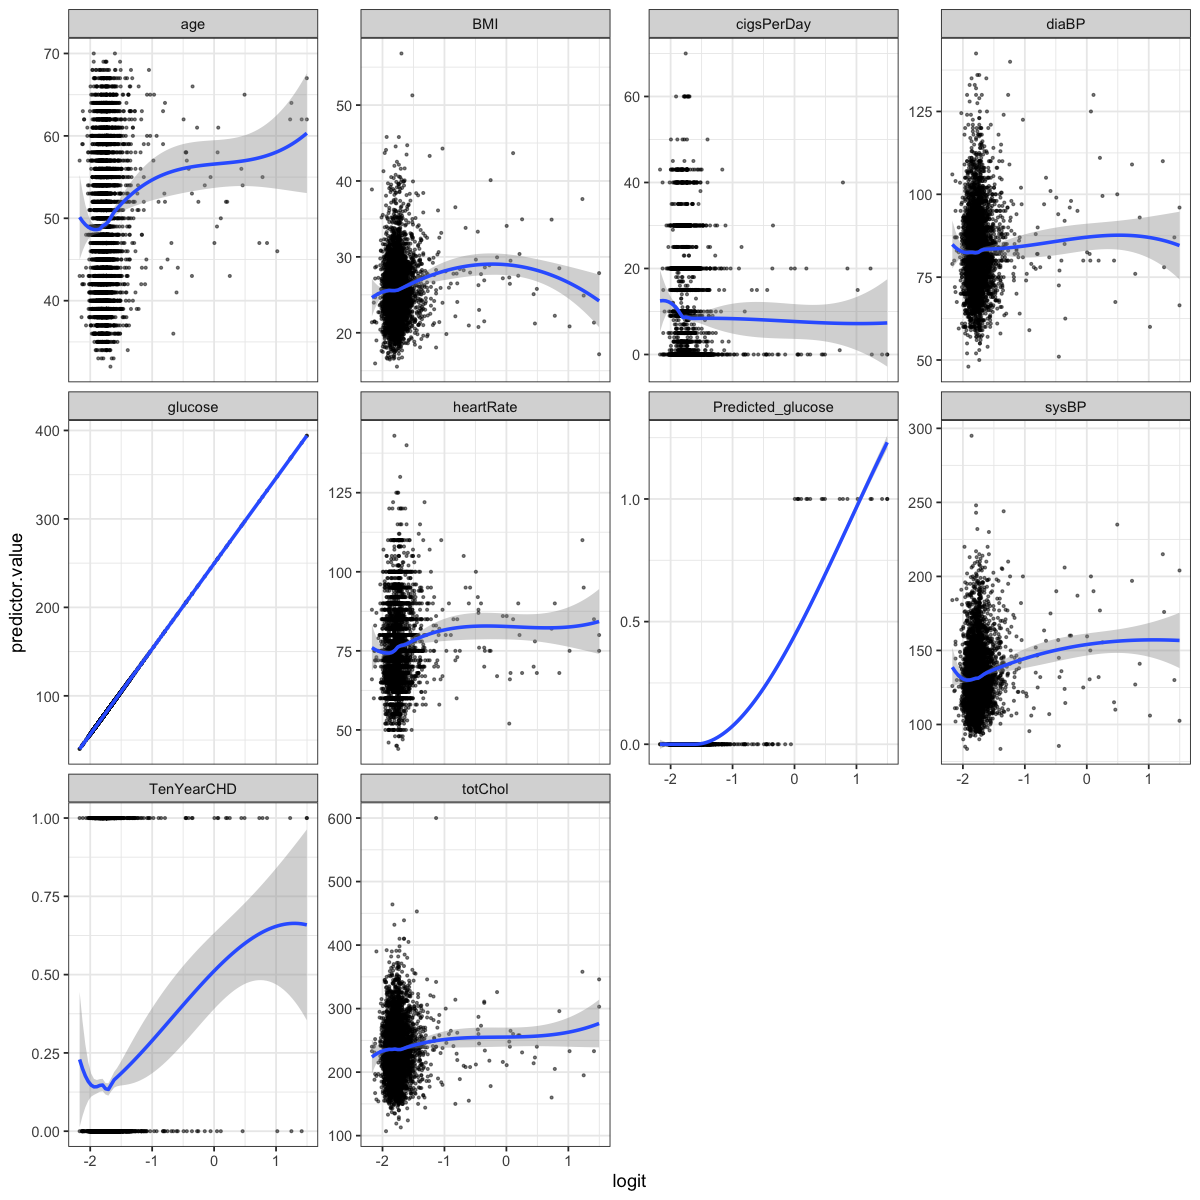

In [77]:
ggplot(logitdf1, aes(logit, predictor.value))+
geom_point(size=.5, alpha=.5)+
geom_smooth(method= "loess")+
theme_bw()+
facet_wrap(~predictors, scales="free_y")

*All of the variables that meet the logit linearity (with ANYCHD) assumption except __DIABP__, which has a pronounced curved in the ANYCHD graph.*

### Independent Errors Assumption

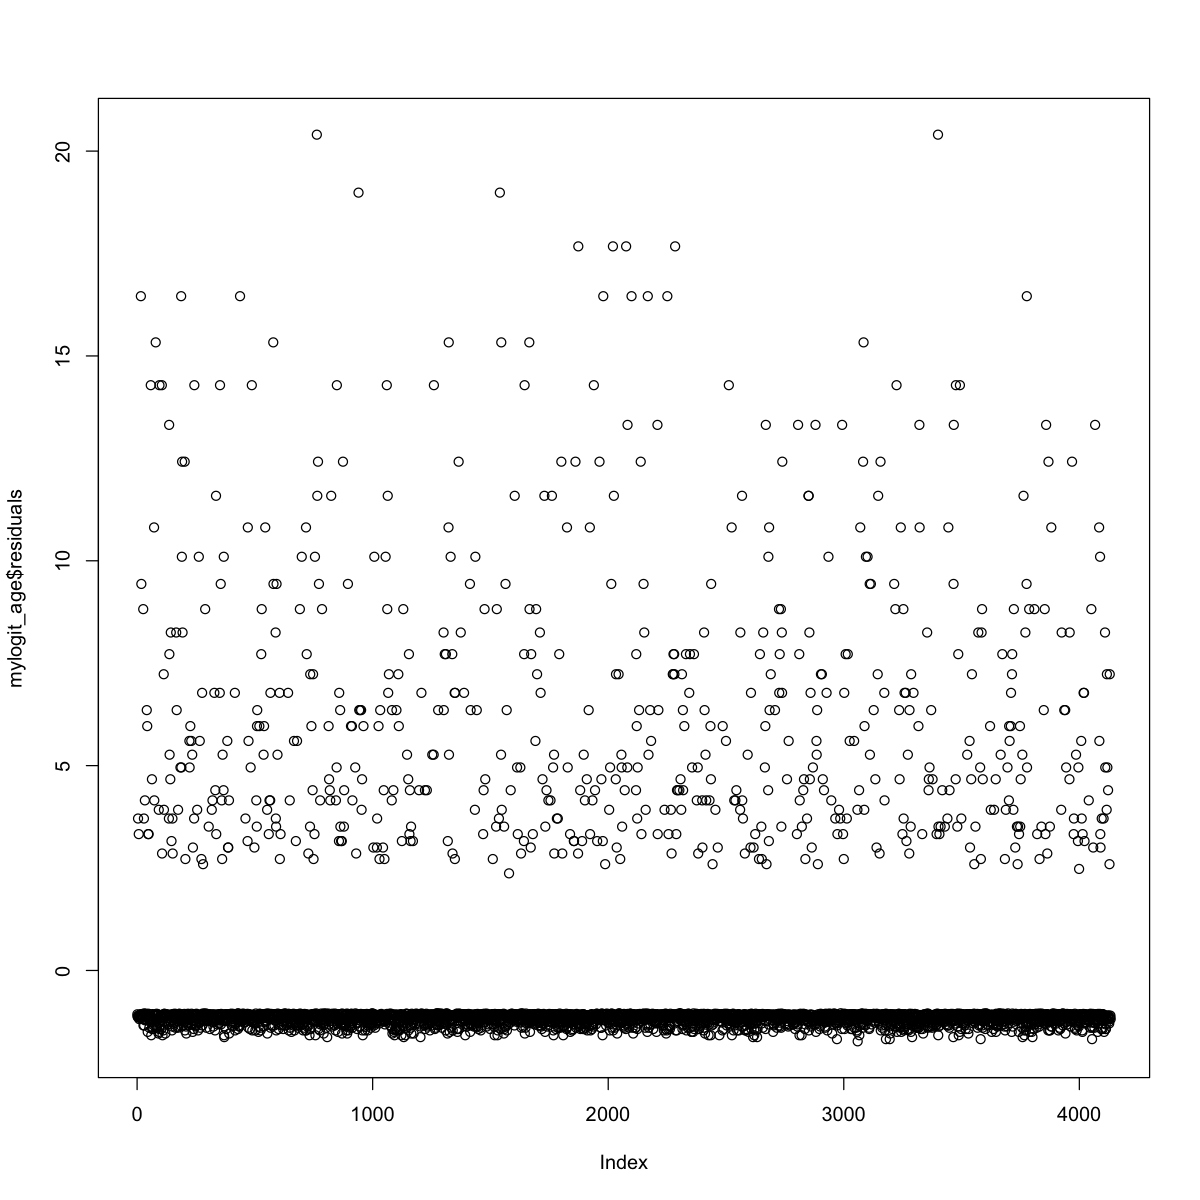

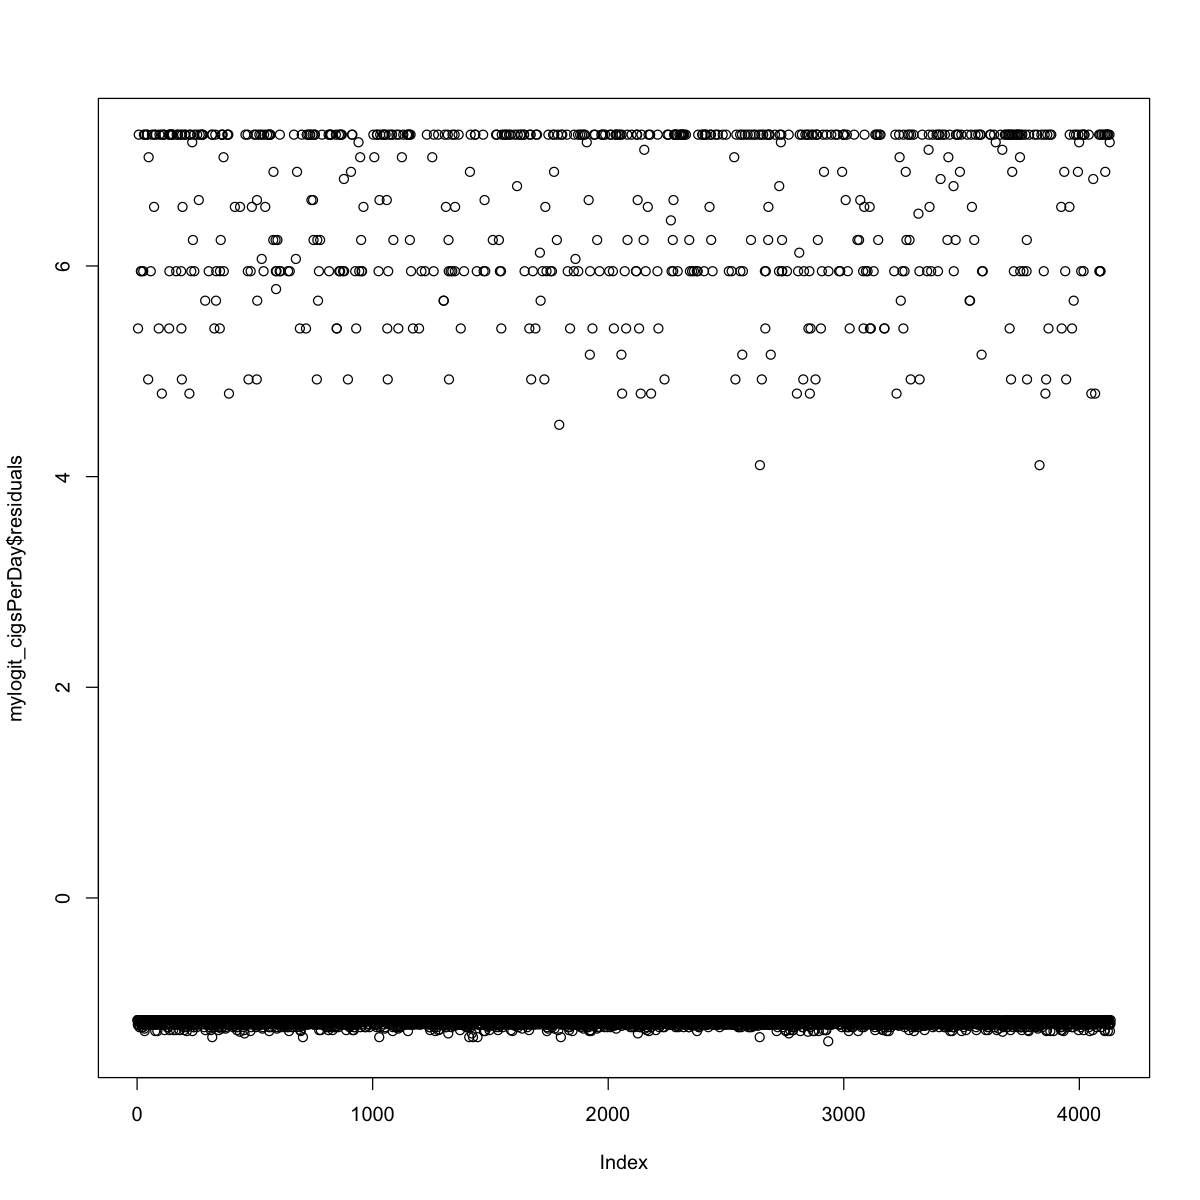

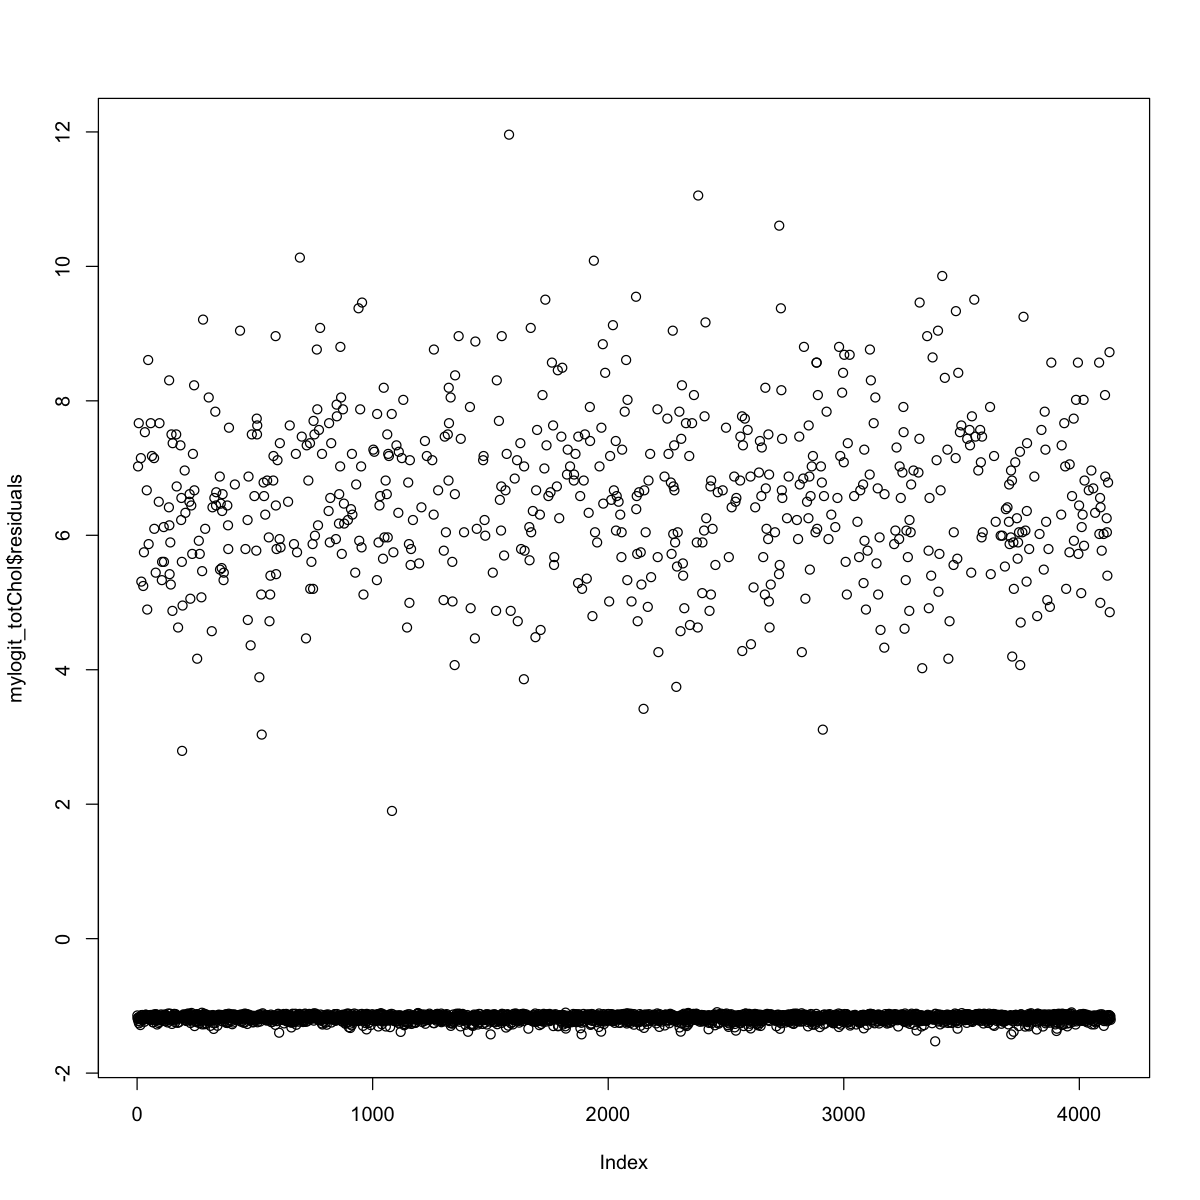

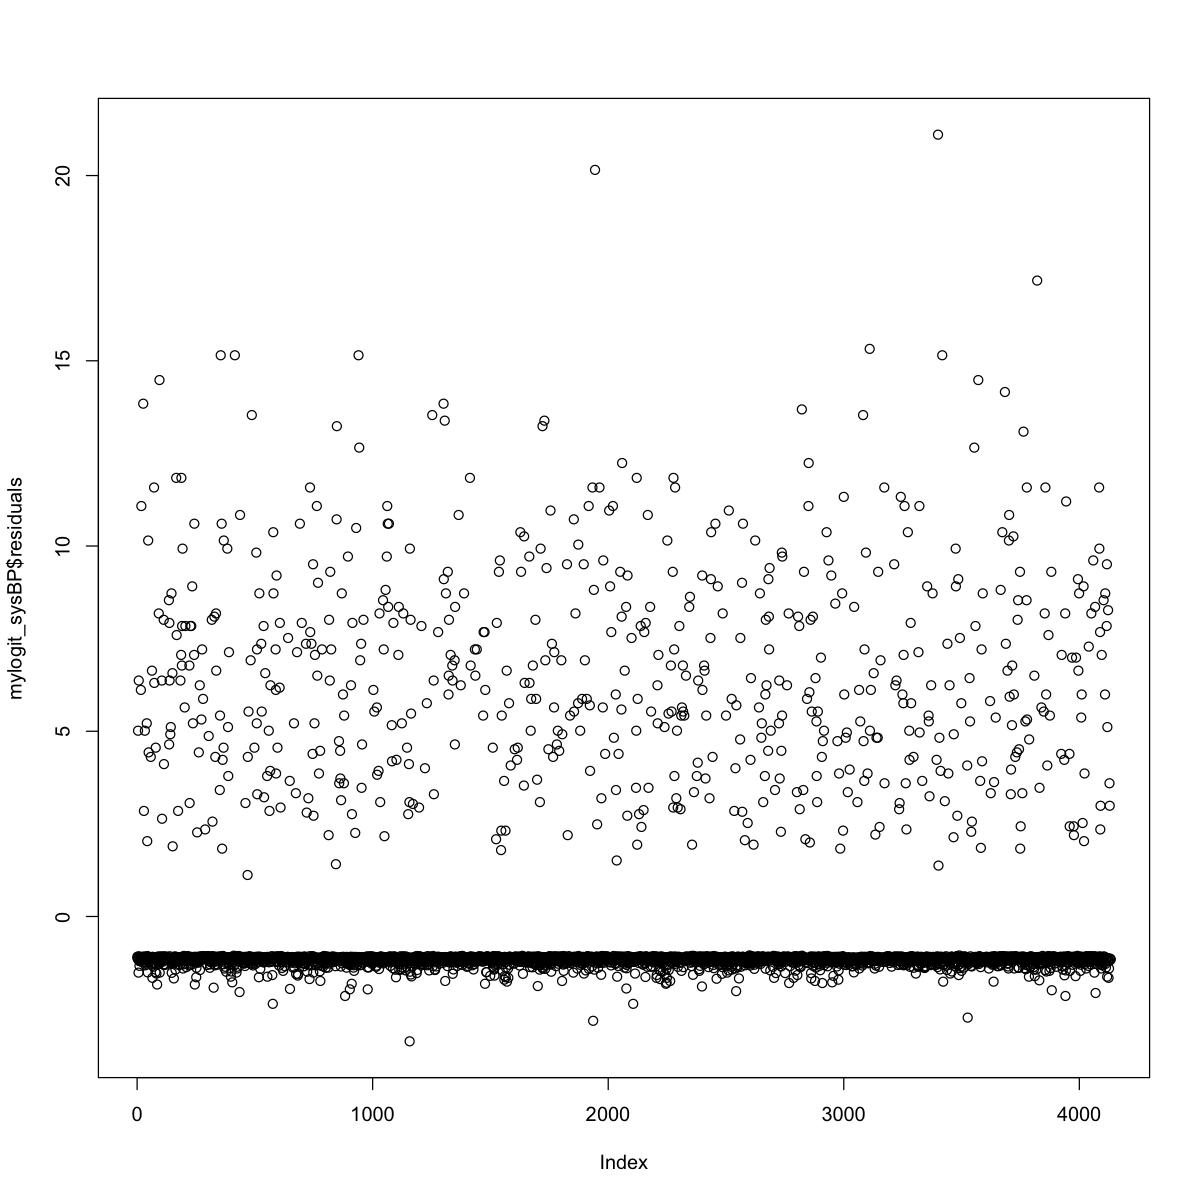

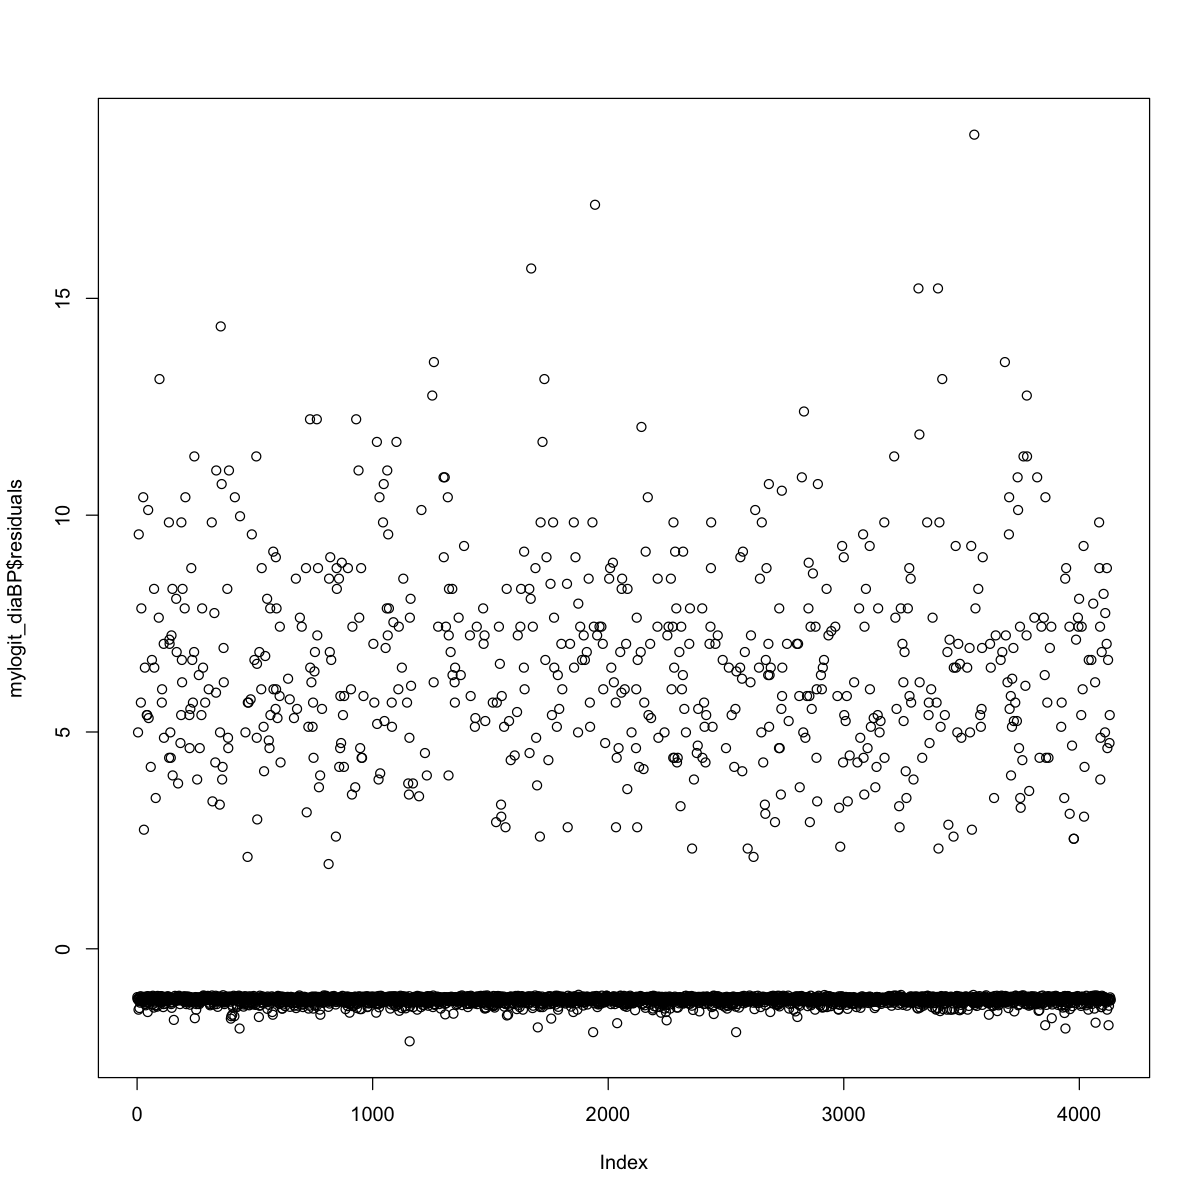

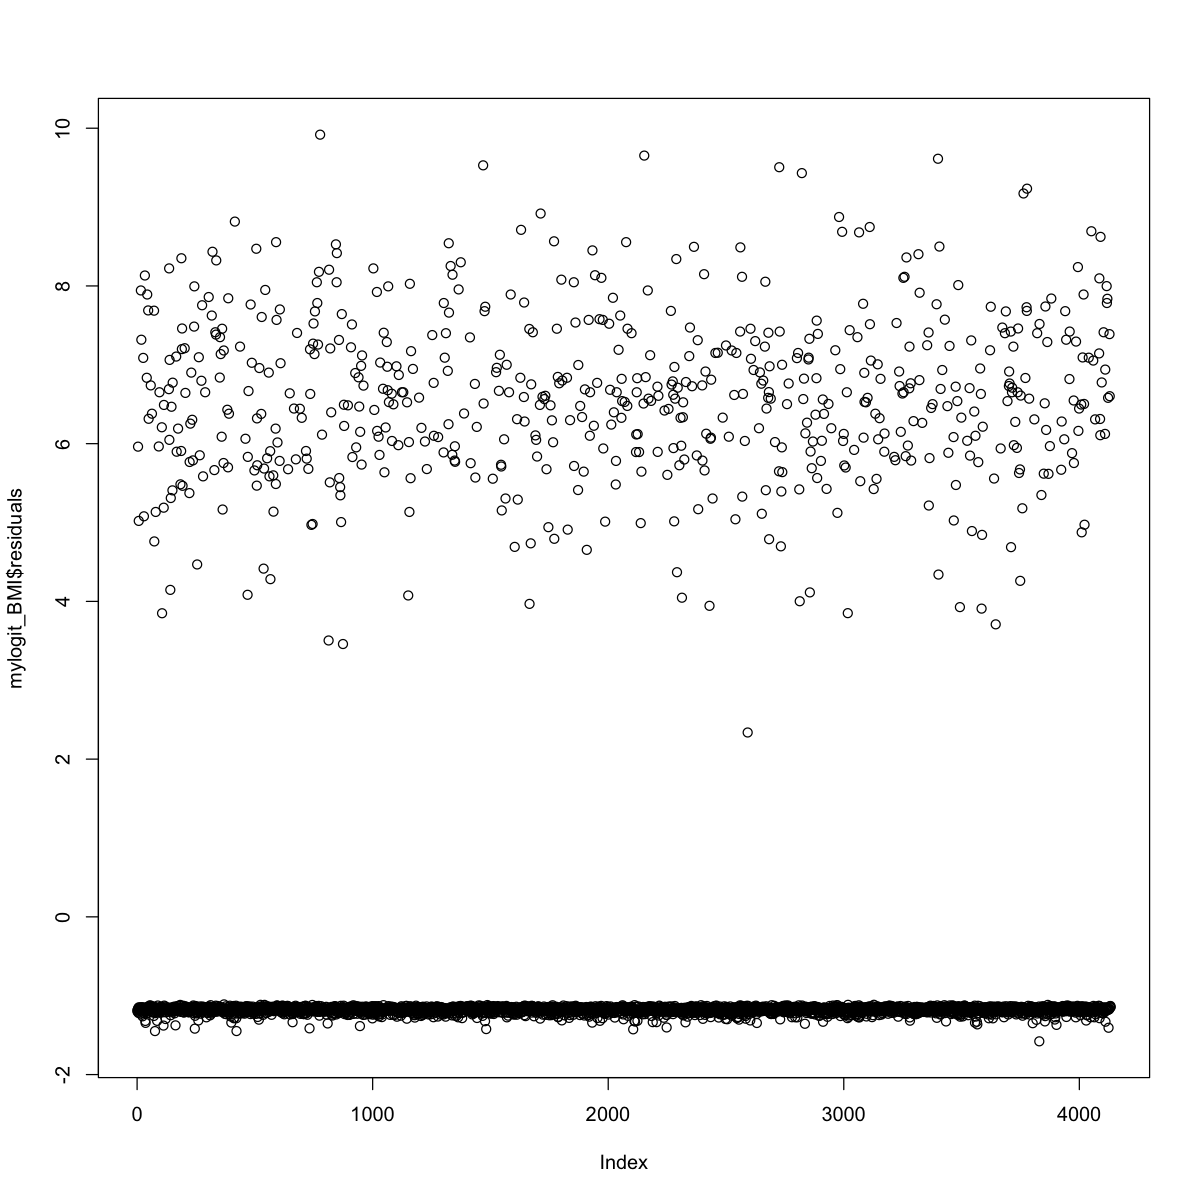

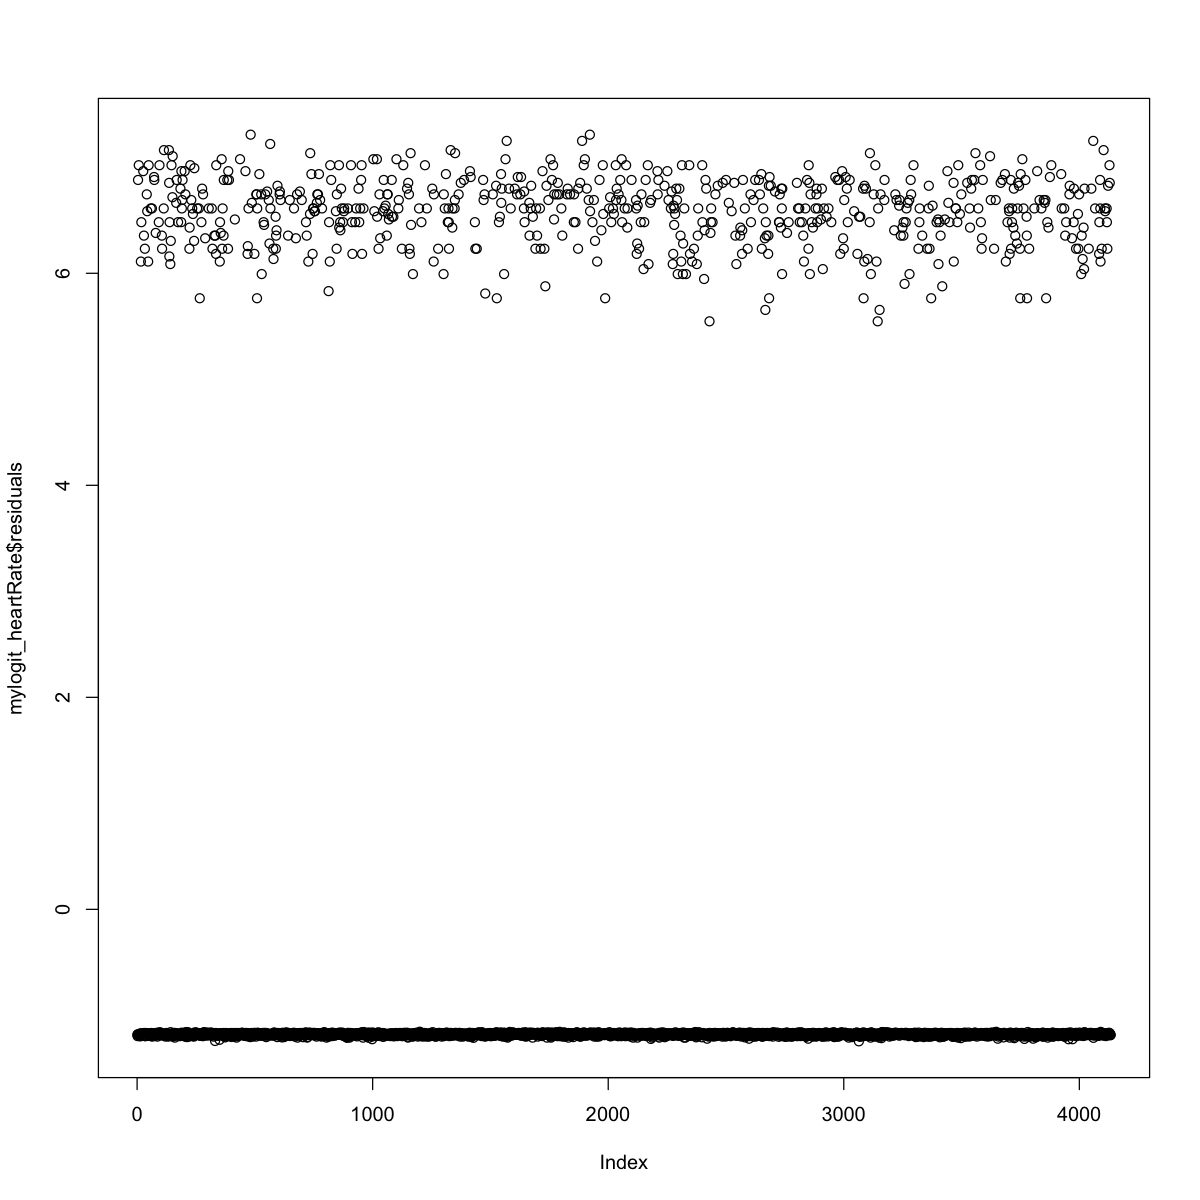

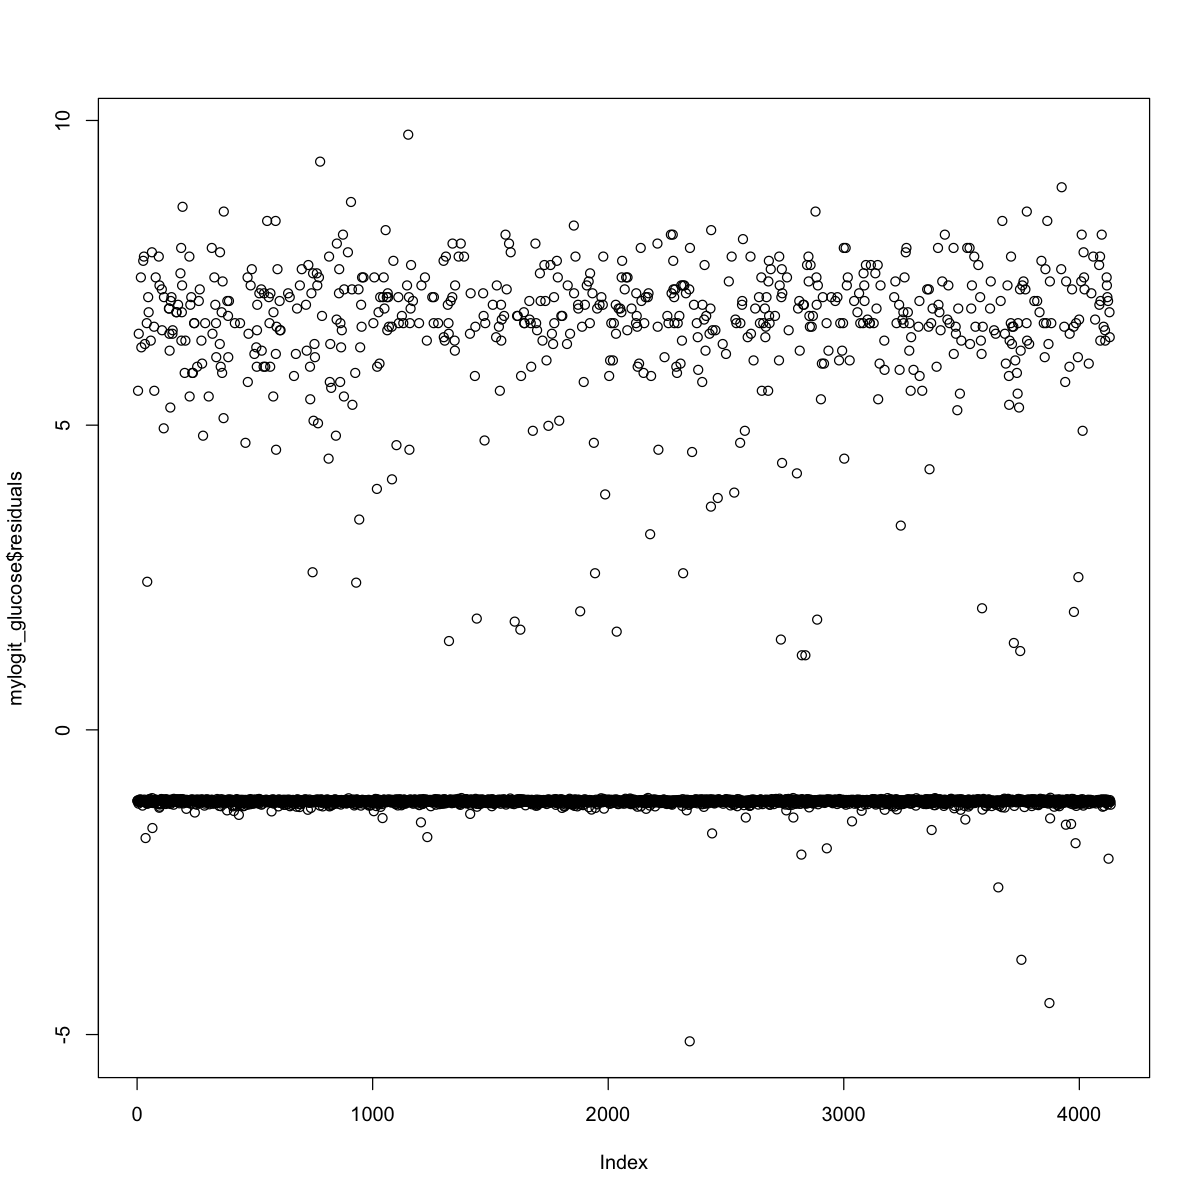

In [78]:
plot(mylogit_AGE$residuals) 
plot(mylogit_CIGPDAY$residuals) 
plot(mylogit_TOTCHOL$residuals) 
plot(mylogit_SYSBP$residuals) 
plot(mylogit_DIABP$residuals) 
plot(mylogit_BMI$residuals) 
plot(mylogit_HEARTRTE$residuals) 
plot(mylogit_GLUCOSE$residuals)

__*The points are evenly distributed  accross the x axis for all of the variables, so all of them meet the assumption of independence of errors*__

### Durbin-Watson Test to confirm indeoendence of errors

In [80]:
library(lmtest)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [81]:
dwtest(mylogit_AGE, alternative="two.sided")
dwtest(mylogit_CIGPDAY, alternative="two.sided")
dwtest(mylogit_TOTCHOL, alternative="two.sided")
dwtest(mylogit_SYSBP, alternative="two.sided")
dwtest(mylogit_DIABP, alternative="two.sided")
dwtest(mylogit_BMI, alternative="two.sided")
dwtest(mylogit_HEARTRTE, alternative="two.sided")
dwtest(mylogit_GLUCOSE, alternative="two.sided")


	Durbin-Watson test

data:  mylogit_age
DW = 2.0415, p-value = 0.182
alternative hypothesis: true autocorrelation is not 0



	Durbin-Watson test

data:  mylogit_cigsPerDay
DW = 2.0362, p-value = 0.244
alternative hypothesis: true autocorrelation is not 0



	Durbin-Watson test

data:  mylogit_totChol
DW = 2.037, p-value = 0.2342
alternative hypothesis: true autocorrelation is not 0



	Durbin-Watson test

data:  mylogit_sysBP
DW = 2.0469, p-value = 0.1317
alternative hypothesis: true autocorrelation is not 0



	Durbin-Watson test

data:  mylogit_diaBP
DW = 2.0385, p-value = 0.2161
alternative hypothesis: true autocorrelation is not 0



	Durbin-Watson test

data:  mylogit_BMI
DW = 2.0325, p-value = 0.2954
alternative hypothesis: true autocorrelation is not 0



	Durbin-Watson test

data:  mylogit_heartRate
DW = 2.0374, p-value = 0.2291
alternative hypothesis: true autocorrelation is not 0



	Durbin-Watson test

data:  mylogit_glucose
DW = 2.0323, p-value = 0.2981
alternative hypothesis: true autocorrelation is not 0


__*None of the tests are statistically significant, which confirms that all of the errors are independent*__

### Screening for outliers

In [83]:
infl_mylogit_AGE = influence.measures(mylogit_AGE) 
summary(infl_mylogit_AGE)

Potentially influential observations of
	 glm(formula = TenYearCHD ~ age, family = "binomial", data = logitdf) :

     dfb.1_ dfb.age dffit   cov.r   cook.d hat    
16    0.06  -0.05    0.06    1.00_*  0.00   0.00  
18    0.03  -0.03    0.04    1.00_*  0.00   0.00  
26    0.03  -0.02    0.04    1.00_*  0.00   0.00  
41    0.01  -0.01    0.04    1.00_*  0.00   0.00  
58    0.05  -0.05    0.06    1.00_*  0.00   0.00  
60    0.03  -0.04   -0.04    1.00_*  0.00   0.00_*
72    0.04  -0.04    0.05    1.00_*  0.00   0.00  
79    0.05  -0.05    0.06    1.00_*  0.00   0.00  
91    0.03  -0.03   -0.04    1.00_*  0.00   0.00_*
95    0.05  -0.05    0.06    1.00_*  0.00   0.00  
105   0.05  -0.05    0.06    1.00_*  0.00   0.00  
106  -0.05   0.05    0.06    1.00    0.00   0.00_*
108   0.03  -0.04   -0.04    1.00_*  0.00   0.00_*
113   0.02  -0.01    0.04    1.00_*  0.00   0.00  
120   0.03  -0.03   -0.04    1.00_*  0.00   0.00_*
136   0.05  -0.04    0.05    1.00_*  0.00   0.00  
137   0.02  -0.02  

In [93]:
infl_mylogit_CIGPDAY = influence.measures(mylogit_CIGPDAY) 
summary(infl_mylogit_CIGPDAY)

Potentially influential observations of
	 glm(formula = TenYearCHD ~ cigsPerDay, family = "binomial", data = logitdf) :

     dfb.1_ dfb.cgPD dffit   cov.r   cook.d hat    
31    0.01  -0.02    -0.03    1.00_*  0.00   0.00  
32    0.01  -0.03    -0.04    1.00_*  0.00   0.00_*
47   -0.02   0.08     0.09_*  1.00    0.00   0.00_*
77    0.01  -0.03    -0.04    1.00_*  0.00   0.00_*
86    0.01  -0.03    -0.04    1.00_*  0.00   0.00_*
105  -0.03   0.09     0.09_*  1.00    0.00   0.00_*
117   0.01  -0.03    -0.03    1.00_*  0.00   0.00_*
139   0.01  -0.03    -0.03    1.00_*  0.00   0.00_*
153   0.01  -0.03    -0.03    1.00_*  0.00   0.00_*
165   0.01  -0.03    -0.03    1.00_*  0.00   0.00_*
180   0.01  -0.03    -0.03    1.00_*  0.00   0.00_*
190  -0.02   0.08     0.09_*  1.00    0.00   0.00_*
200   0.01  -0.03    -0.03    1.00_*  0.00   0.00_*
211   0.01  -0.03    -0.04    1.00_*  0.00   0.00_*
222  -0.03   0.09     0.09_*  1.00    0.00   0.00_*
235   0.01  -0.03    -0.04    1.00_*  0.00   0.

In [94]:
infl_mylogit_TOTCHOL = influence.measures(mylogit_TOTCHOL) 
summary(infl_mylogit_TOTCHOL)

Potentially influential observations of
	 glm(formula = TenYearCHD ~ totChol, family = "binomial", data = logitdf) :

     dfb.1_ dfb.ttCh dffit   cov.r   cook.d hat    
4     0.02  -0.01     0.04    1.00_*  0.00   0.00  
7     0.03  -0.03     0.04    1.00_*  0.00   0.00  
14    0.02  -0.03    -0.03    1.00_*  0.00   0.00_*
16    0.02  -0.02     0.04    1.00_*  0.00   0.00  
33    0.03  -0.02     0.04    1.00_*  0.00   0.00  
58    0.03  -0.03     0.04    1.00_*  0.00   0.00  
63    0.02  -0.02     0.04    1.00_*  0.00   0.00  
72    0.02  -0.02     0.04    1.00_*  0.00   0.00  
85    0.02  -0.02    -0.03    1.00_*  0.00   0.00  
95    0.03  -0.03     0.04    1.00_*  0.00   0.00  
146   0.03  -0.02     0.04    1.00_*  0.00   0.00  
151   0.03  -0.02     0.04    1.00_*  0.00   0.00  
166   0.03  -0.02     0.04    1.00_*  0.00   0.00  
174  -0.05   0.06     0.07_*  1.00    0.00   0.00  
184   0.03  -0.02     0.04    1.00_*  0.00   0.00  
191  -0.15   0.16     0.16_*  1.01_*  0.01   0.01_

In [95]:
infl_mylogit_SYSBP = influence.measures(mylogit_SYSBP) 
summary(infl_mylogit_SYSBP)

Potentially influential observations of
	 glm(formula = TenYearCHD ~ sysBP, family = "binomial", data = logitdf) :

     dfb.1_ dfb.syBP dffit   cov.r   cook.d hat    
6     0.03  -0.03    -0.04    1.00_*  0.00   0.00_*
7     0.01   0.00     0.03    1.00_*  0.00   0.00  
18    0.04  -0.04     0.05    1.00_*  0.00   0.00  
26    0.05  -0.05     0.05    1.00_*  0.00   0.00  
29   -0.05   0.06     0.07_*  1.00    0.00   0.00_*
43   -0.07   0.08     0.09_*  1.00_*  0.00   0.00_*
45    0.03  -0.03    -0.04    1.00_*  0.00   0.00_*
47    0.04  -0.03     0.04    1.00_*  0.00   0.00  
63    0.01  -0.01     0.03    1.00_*  0.00   0.00  
65    0.04  -0.05    -0.06    1.00_*  0.00   0.00_*
72    0.04  -0.04     0.05    1.00_*  0.00   0.00  
73    0.01   0.00     0.03    1.00_*  0.00   0.00  
78    0.03  -0.03    -0.04    1.00_*  0.00   0.00_*
82    0.03  -0.04    -0.04    1.00_*  0.00   0.00_*
85    0.06  -0.07    -0.07_*  1.00_*  0.00   0.00_*
92    0.02  -0.02     0.04    1.00_*  0.00   0.00  


In [96]:
infl_mylogit_DIABP = influence.measures(mylogit_DIABP) 
summary(infl_mylogit_DIABP)

Potentially influential observations of
	 glm(formula = TenYearCHD ~ diaBP, family = "binomial", data = logitdf) :

     dfb.1_ dfb.diBP dffit   cov.r   cook.d hat    
6     0.03  -0.03    -0.04    1.00_*  0.00   0.00_*
7     0.04  -0.04     0.05    1.00_*  0.00   0.00  
10    0.03  -0.03    -0.03    1.00_*  0.00   0.00  
18    0.02  -0.02     0.04    1.00_*  0.00   0.00  
26    0.05  -0.04     0.05    1.00_*  0.00   0.00  
29   -0.09   0.09     0.10_*  1.00_*  0.00   0.00_*
45    0.04  -0.04    -0.05    1.00_*  0.00   0.00_*
47    0.05  -0.04     0.05    1.00_*  0.00   0.00  
63    0.01  -0.01     0.03    1.00_*  0.00   0.00  
72    0.03  -0.03     0.04    1.00_*  0.00   0.00  
79   -0.06   0.07     0.07_*  1.00    0.00   0.00_*
92    0.02  -0.02     0.04    1.00_*  0.00   0.00  
95    0.06  -0.06     0.07    1.00_*  0.00   0.00  
113   0.02  -0.01     0.03    1.00_*  0.00   0.00  
135   0.04  -0.04     0.05    1.00_*  0.00   0.00  
137   0.02  -0.01     0.04    1.00_*  0.00   0.00  


In [97]:
infl_mylogit_BMI = influence.measures(mylogit_BMI) 
summary(infl_mylogit_BMI)

Potentially influential observations of
	 glm(formula = TenYearCHD ~ BMI, family = "binomial", data = logitdf) :

     dfb.1_ dfb.BMI dffit   cov.r   cook.d hat    
18    0.03  -0.02    0.04    1.00_*  0.00   0.00  
23    0.02  -0.02   -0.03    1.00_*  0.00   0.00  
26    0.02  -0.02    0.04    1.00_*  0.00   0.00  
35    0.04  -0.04   -0.05    1.00_*  0.00   0.00_*
36    0.05  -0.05   -0.05    1.00_*  0.00   0.00_*
41    0.01  -0.01    0.03    1.00_*  0.00   0.00  
71    0.02  -0.02   -0.03    1.00_*  0.00   0.00  
73   -0.06   0.06    0.07_*  1.00    0.00   0.00_*
76    0.08  -0.09   -0.09_*  1.01_*  0.00   0.01_*
85    0.04  -0.04   -0.05    1.00_*  0.00   0.00_*
106  -0.11   0.11    0.12_*  1.00_*  0.01   0.00_*
112   0.06  -0.06   -0.06    1.01_*  0.00   0.01_*
121   0.03  -0.03   -0.04    1.00_*  0.00   0.00_*
138   0.02  -0.02    0.04    1.00_*  0.00   0.00  
141  -0.09   0.10    0.10_*  1.00_*  0.00   0.00_*
163   0.06  -0.06   -0.06    1.01_*  0.00   0.01_*
166   0.02  -0.02  

In [98]:
infl_mylogit_HEARTRTE = influence.measures(mylogit_HEARTRTE) 
summary(infl_mylogit_HEARTRTE)

Potentially influential observations of
	 glm(formula = TenYearCHD ~ heartRate, family = "binomial", data = logitdf) :

     dfb.1_ dfb.hrtR dffit   cov.r   cook.d hat    
65    0.02  -0.02    -0.02    1.00_*  0.00   0.00  
86    0.02  -0.02    -0.02    1.00_*  0.00   0.00  
97   -0.02   0.02    -0.02    1.00_*  0.00   0.00  
121   0.02  -0.02    -0.02    1.00_*  0.00   0.00  
134   0.02  -0.02    -0.02    1.00_*  0.00   0.00  
142  -0.02   0.02    -0.02    1.00_*  0.00   0.00  
160   0.03  -0.03    -0.03    1.00_*  0.00   0.00_*
203   0.02  -0.02    -0.02    1.00_*  0.00   0.00  
208  -0.02   0.02    -0.02    1.00_*  0.00   0.00  
212   0.02  -0.03    -0.03    1.00_*  0.00   0.00_*
216  -0.02   0.02    -0.02    1.00_*  0.00   0.00  
220   0.02  -0.02    -0.02    1.00_*  0.00   0.00  
241   0.02  -0.02    -0.02    1.00_*  0.00   0.00  
266  -0.09   0.09     0.10_*  1.00    0.01   0.00_*
285  -0.02   0.02    -0.02    1.00_*  0.00   0.00  
325   0.02  -0.02    -0.02    1.00_*  0.00   0.0

In [99]:
infl_mylogit_GLUCOSE = influence.measures(mylogit_GLUCOSE)
summary(infl_mylogit_GLUCOSE)

Potentially influential observations of
	 glm(formula = TenYearCHD ~ glucose, family = "binomial", data = logitdf) :

     dfb.1_ dfb.glcs dffit   cov.r   cook.d hat    
16    0.03  -0.02     0.04    1.00_*  0.00   0.00  
26    0.03  -0.02     0.04    1.00_*  0.00   0.00  
29    0.03  -0.02     0.04    1.00_*  0.00   0.00  
36    0.12  -0.13    -0.13_*  1.01_*  0.01   0.01_*
41    0.01   0.00     0.03    1.00_*  0.00   0.00  
43   -0.13   0.15     0.15_*  1.01_*  0.01   0.01_*
47    0.02  -0.01     0.03    1.00_*  0.00   0.00  
49    0.02  -0.01     0.03    1.00_*  0.00   0.00  
63    0.03  -0.02     0.04    1.00_*  0.00   0.00  
65    0.09  -0.10    -0.10_*  1.01_*  0.00   0.01_*
79    0.03  -0.02     0.04    1.00_*  0.00   0.00  
92    0.03  -0.02     0.04    1.00_*  0.00   0.00  
95    0.02  -0.01     0.04    1.00_*  0.00   0.00  
105   0.02  -0.01     0.04    1.00_*  0.00   0.00  
114   0.02  -0.01     0.03    1.00_*  0.00   0.00  
135   0.02  -0.01     0.03    1.00_*  0.00   0.00 

## Assumption Checking Summary
* The variables that meet the sample size assumption are __GLUCOSE__ and __SYSBP__
* The variables that meet the logit linearity assumption are __AGE__, __BMI__, __CIGPDAY__, __SYSBP__, __HEARTRTE__, and __TOTCHOL__.
* All of the variables have independent errors
* Multicollinearity: we noted in the exploratory data analysis that SYSBP and DIABP are strongly correlated, so we will have to eliminate one of them
* None of the variables have outliers:
    * dfb.1_ and dffit values are less than 1
    * hat < .3

In [81]:
summary(mylogit_SYSBP)


Call:
glm(formula = TenYearCHD ~ sysBP, family = "binomial", data = logitdf)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5588  -0.5812  -0.4935  -0.4201   2.4696  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -5.023674   0.258651  -19.42   <2e-16 ***
sysBP        0.024225   0.001819   13.31   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 3521.9  on 4132  degrees of freedom
Residual deviance: 3344.0  on 4131  degrees of freedom
AIC: 3348

Number of Fisher Scoring iterations: 4


In [100]:
coef(mylogit_SYSBP)

(Intercept)       sysBP 
-5.02367357  0.02422481

***
## If all of the variables had met the assumptions
### Method based on [www.utstat.toronto.edu](http://www.utstat.toronto.edu/~brunner/oldclass/appliedf11/handouts/2101f11StepwiseLogisticR.pdf)

### Run the full model

#### Dropping DIABP due to multicollinearity 

In [101]:
head(logitdf)

age cigsPerDay totChol sysBP diaBP BMI   heartRate glucose TenYearCHD
1 39   0         195     106.0  70   26.97 80         77     0         
2 46   0         250     121.0  81   28.73 95         76     0         
3 48  20         245     127.5  80   25.34 75         70     0         
4 61  30         225     150.0  95   28.58 65        103     1         
5 46  23         285     130.0  84   23.10 85         85     0         
6 43   0         228     180.0 110   30.30 77         99     0         
  Predicted_glucose
1 0                
2 0                
3 0                
4 0                
5 0                
6 0

In [103]:
logitdfLR = subset(logitdf, select = -c(DIABP, Predicted_GLUCOSE))
head(logitdfLR)

age cigsPerDay totChol sysBP BMI   heartRate glucose TenYearCHD
1 39   0         195     106.0 26.97 80         77     0         
2 46   0         250     121.0 28.73 95         76     0         
3 48  20         245     127.5 25.34 75         70     0         
4 61  30         225     150.0 28.58 65        103     1         
5 46  23         285     130.0 23.10 85         85     0         
6 43   0         228     180.0 30.30 77         99     0

In [104]:
fullmod = glm(ANYCHD ~ ., data = logitdfLR,family=binomial)
summary(fullmod)


Call:
glm(formula = TenYearCHD ~ ., family = binomial, data = logitdfLR)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8392  -0.6021  -0.4380  -0.3124   2.7421  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -8.303615   0.531178 -15.632  < 2e-16 ***
age          0.065461   0.006102  10.728  < 2e-16 ***
cigsPerDay   0.027287   0.003711   7.353 1.94e-13 ***
totChol      0.001166   0.001052   1.108    0.268    
sysBP        0.016158   0.002129   7.590 3.21e-14 ***
BMI          0.007705   0.011275   0.683    0.494    
heartRate   -0.004888   0.003880  -1.260    0.208    
glucose      0.007576   0.001651   4.589 4.46e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 3521.9  on 4132  degrees of freedom
Residual deviance: 3164.5  on 4125  degrees of freedom
AIC: 3180.5

Number of Fisher Scoring iterations: 5


__*It seems that AGE, cigarretes per day, total cholesterol, systolic blood pressure, and GLUCOSE are the only factors that are significant predictors*__

In [105]:
nullmodel = glm(ANYCHD ~ 1, data = logitdfLR, family=binomial)
summary(nullmodel)


Call:
glm(formula = TenYearCHD ~ 1, family = binomial, data = logitdfLR)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.5741  -0.5741  -0.5741  -0.5741   1.9412  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.71941    0.04333  -39.68   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 3521.9  on 4132  degrees of freedom
Residual deviance: 3521.9  on 4132  degrees of freedom
AIC: 3523.9

Number of Fisher Scoring iterations: 3


In [106]:
backwards = step(fullmod)

Start:  AIC=3180.5
TenYearCHD ~ age + cigsPerDay + totChol + sysBP + BMI + heartRate + 
    glucose

             Df Deviance    AIC
- BMI         1   3165.0 3179.0
- totChol     1   3165.7 3179.7
- heartRate   1   3166.1 3180.1
<none>            3164.5 3180.5
- glucose     1   3185.6 3199.6
- cigsPerDay  1   3216.5 3230.5
- sysBP       1   3222.0 3236.0
- age         1   3283.3 3297.3

Step:  AIC=3178.97
TenYearCHD ~ age + cigsPerDay + totChol + sysBP + heartRate + 
    glucose

             Df Deviance    AIC
- totChol     1   3166.2 3178.2
- heartRate   1   3166.5 3178.5
<none>            3165.0 3179.0
- glucose     1   3186.3 3198.3
- cigsPerDay  1   3216.5 3228.5
- sysBP       1   3230.2 3242.2
- age         1   3283.4 3295.4

Step:  AIC=3178.2
TenYearCHD ~ age + cigsPerDay + sysBP + heartRate + glucose

             Df Deviance    AIC
- heartRate   1   3167.6 3177.6
<none>            3166.2 3178.2
- glucose     1   3187.6 3197.6
- cigsPerDay  1   3217.6 3227.6
- sysBP       1   3

In [107]:
summary(backwards)


Call:
glm(formula = TenYearCHD ~ age + cigsPerDay + sysBP + glucose, 
    family = binomial, data = logitdfLR)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9066  -0.5978  -0.4388  -0.3150   2.7259  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -8.259360   0.385654 -21.417  < 2e-16 ***
age          0.066785   0.006017  11.099  < 2e-16 ***
cigsPerDay   0.026679   0.003688   7.234 4.69e-13 ***
sysBP        0.016245   0.001993   8.150 3.64e-16 ***
glucose      0.007477   0.001646   4.542 5.58e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 3521.9  on 4132  degrees of freedom
Residual deviance: 3167.6  on 4128  degrees of freedom
AIC: 3177.6

Number of Fisher Scoring iterations: 5


In [108]:
forwards = step(nullmodel,scope=list(lower=formula(nullmodel),upper=formula(fullmod)), direction="forward")

Start:  AIC=3523.92
TenYearCHD ~ 1

             Df Deviance    AIC
+ age         1   3306.4 3310.4
+ sysBP       1   3344.0 3348.0
+ glucose     1   3477.9 3481.9
+ totChol     1   3494.1 3498.1
+ BMI         1   3501.3 3505.3
+ cigsPerDay  1   3510.9 3514.9
<none>            3521.9 3523.9
+ heartRate   1   3520.2 3524.2

Step:  AIC=3310.4
TenYearCHD ~ age

             Df Deviance    AIC
+ sysBP       1   3236.4 3242.4
+ cigsPerDay  1   3262.3 3268.3
+ glucose     1   3280.5 3286.5
+ BMI         1   3298.9 3304.9
+ totChol     1   3302.8 3308.8
+ heartRate   1   3304.2 3310.2
<none>            3306.4 3310.4

Step:  AIC=3242.42
TenYearCHD ~ age + sysBP

             Df Deviance    AIC
+ cigsPerDay  1   3188.2 3196.2
+ glucose     1   3217.9 3225.9
<none>            3236.4 3242.4
+ totChol     1   3235.4 3243.4
+ BMI         1   3236.3 3244.3
+ heartRate   1   3236.4 3244.4

Step:  AIC=3196.24
TenYearCHD ~ age + sysBP + cigsPerDay

            Df Deviance    AIC
+ glucose    1   3167.6

In [109]:
summary(forwards)


Call:
glm(formula = TenYearCHD ~ age + sysBP + cigsPerDay + glucose, 
    family = binomial, data = logitdfLR)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9066  -0.5978  -0.4388  -0.3150   2.7259  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -8.259360   0.385654 -21.417  < 2e-16 ***
age          0.066785   0.006017  11.099  < 2e-16 ***
sysBP        0.016245   0.001993   8.150 3.64e-16 ***
cigsPerDay   0.026679   0.003688   7.234 4.69e-13 ***
glucose      0.007477   0.001646   4.542 5.58e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 3521.9  on 4132  degrees of freedom
Residual deviance: 3167.6  on 4128  degrees of freedom
AIC: 3177.6

Number of Fisher Scoring iterations: 5


In [110]:
bothways = step(nullmodel, list(lower=formula(nullmodel),upper=formula(fullmod)),direction="both",trace=0)
summary(bothways)


Call:
glm(formula = TenYearCHD ~ age + sysBP + cigsPerDay + glucose, 
    family = binomial, data = logitdfLR)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9066  -0.5978  -0.4388  -0.3150   2.7259  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -8.259360   0.385654 -21.417  < 2e-16 ***
age          0.066785   0.006017  11.099  < 2e-16 ***
sysBP        0.016245   0.001993   8.150 3.64e-16 ***
cigsPerDay   0.026679   0.003688   7.234 4.69e-13 ***
glucose      0.007477   0.001646   4.542 5.58e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 3521.9  on 4132  degrees of freedom
Residual deviance: 3167.6  on 4128  degrees of freedom
AIC: 3177.6

Number of Fisher Scoring iterations: 5


In [111]:
formula(backwards)

TenYearCHD ~ age + cigsPerDay + sysBP + glucose

In [112]:
formula(forwards)

TenYearCHD ~ age + sysBP + cigsPerDay + glucose

In [113]:
formula(bothways)

TenYearCHD ~ age + sysBP + cigsPerDay + glucose

## Method based on [www.sthda.com](http://www.sthda.com/english/articles/36-classification-methods-essentials/150-stepwise-logistic-regression-essentials-in-r/)

### Load libraries

In [114]:
library("caret")
library("MASS")
library("tidyverse")

Loading required package: lattice


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ purrr::lift()   masks caret::lift()
✖ MASS::select()  masks dplyr::select()



In [115]:
head(logitdfLR)

age cigsPerDay totChol sysBP BMI   heartRate glucose TenYearCHD
1 39   0         195     106.0 26.97 80         77     0         
2 46   0         250     121.0 28.73 95         76     0         
3 48  20         245     127.5 25.34 75         70     0         
4 61  30         225     150.0 28.58 65        103     1         
5 46  23         285     130.0 23.10 85         85     0         
6 43   0         228     180.0 30.30 77         99     0

### Split the data into training and test set

In [116]:
training.samples = logitdfLR$ANYCHD %>% createDataPartition(p= 0.8, list = FALSE)
train.data  <- logitdfLR[training.samples, ]
test.data <- logitdfLR[-training.samples, ]

### Fit the model

In [117]:
# stepAIC function: default direction is backward - arg: direction = c("both", "backward", "forward")
mylogit  = glm(ANYCHD ~ ., data = train.data, family = binomial) %>% stepAIC(trace = FALSE)
summary(mylogit)


Call:
glm(formula = TenYearCHD ~ age + cigsPerDay + sysBP + glucose, 
    family = binomial, data = train.data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8775  -0.6010  -0.4410  -0.3181   2.7097  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -8.181147   0.426822 -19.168  < 2e-16 ***
age          0.066878   0.006680  10.011  < 2e-16 ***
cigsPerDay   0.023808   0.004209   5.656 1.55e-08 ***
sysBP        0.016183   0.002233   7.247 4.26e-13 ***
glucose      0.007100   0.001781   3.986 6.73e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2840.3  on 3306  degrees of freedom
Residual deviance: 2558.8  on 3302  degrees of freedom
AIC: 2568.8

Number of Fisher Scoring iterations: 5


### Predict Probabilities Risk/No Risk for heart disease

In [118]:
probabilities <- mylogit %>% predict(test.data, type = "response")
predicted.classes <- ifelse(probabilities > 0.5, 1, 0)

### Model Accuracy

In [119]:
# Model accuracy
mean(predicted.classes==test.data$ANYCHD)

[1] 0.8571429

In [128]:
mean(train.data$ANYCHD)

[1] 0.1539159

### Full Model

In [125]:
full.model <- glm(ANYCHD ~., data = train.data, family = binomial)
summary(full.model)


Call:
glm(formula = TenYearCHD ~ ., family = binomial, data = train.data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8360  -0.6004  -0.4401  -0.3176   2.7177  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -7.9298915  0.5865104 -13.520  < 2e-16 ***
age          0.0655682  0.0067798   9.671  < 2e-16 ***
cigsPerDay   0.0242412  0.0042329   5.727 1.02e-08 ***
totChol      0.0008315  0.0011727   0.709    0.478    
sysBP        0.0166518  0.0023740   7.014 2.31e-12 ***
BMI         -0.0007191  0.0125389  -0.057    0.954    
heartRate   -0.0059153  0.0043147  -1.371    0.170    
glucose      0.0073000  0.0017909   4.076 4.58e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2840.3  on 3306  degrees of freedom
Residual deviance: 2556.5  on 3299  degrees of freedom
AIC: 2572.5

Number of Fisher Scoring iterations: 5


### Stepwise Selection

In [127]:
step.model <- full.model %>% stepAIC(trace = FALSE)
summary(step.model)


Call:
glm(formula = TenYearCHD ~ age + cigsPerDay + sysBP + glucose, 
    family = binomial, data = train.data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8775  -0.6010  -0.4410  -0.3181   2.7097  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -8.181147   0.426822 -19.168  < 2e-16 ***
age          0.066878   0.006680  10.011  < 2e-16 ***
cigsPerDay   0.023808   0.004209   5.656 1.55e-08 ***
sysBP        0.016183   0.002233   7.247 4.26e-13 ***
glucose      0.007100   0.001781   3.986 6.73e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2840.3  on 3306  degrees of freedom
Residual deviance: 2558.8  on 3302  degrees of freedom
AIC: 2568.8

Number of Fisher Scoring iterations: 5


### Compare the full and the stepwise models

#### 1. Full Model

In [123]:
# Make predictions
probabilities <- full.model %>% predict(test.data, type = "response")
predicted.classes <- ifelse(probabilities > 0.5, 1, 0)
# Prediction accuracy
observed.classes <- test.data$ANYCHD
mean(predicted.classes == observed.classes)

[1] 0.8571429

#### 2. Stepwise Model

In [124]:
# Make predictions
probabilities <- predict(step.model, test.data, type = "response")
predicted.classes <- ifelse(probabilities > 0.5, 1, 0)
# Prediction accuracy
observed.classes <- test.data$ANYCHD
mean(predicted.classes == observed.classes)

[1] 0.8571429

### The stepwise model is best because it is less complex and achieves the same accuracy. Also, the full model includes variables that are not significant predictors of the CHD risk (p value > .05).